# Featuring Engineering and Model Building 

## Overview

I used Sklearn - an open source, low-code machine learning library in Python that awhich enables predictive analysis in a simply and efficient way.

### Summary of Workflow

- Variables Normalization 

- Creation of New Variables

- Transforming boolean data

- Onehot econder 

- Log Transformation

- Verify Correletion beetween variables

- Splittitng data by 75% - 25% ratio

- Evaluating models by the following metrics: Accuracy, Confusion Matrix, Classification Report, ROC Curve, AUC Score

- I tested and fine-tuned the selected model using train and test data simultaneously across 10 blocks (best practices) of randomised observations using the statistical method of stratified kfold validation   

### Hypothesis

One of the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it is possible to predict customers likely to churn using a predictive model. The client also wants to try a discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

## Import packages

First of all, we need to import all the libraries that are required for building models to predict the churn rate.

In [863]:
#### Import packages
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# show plots in jupyter notebook
%matplotlib inline
# set plot style
sns.set(color_codes = True)
# set minimum number of columns to be displayed
pd.set_option('display.max_columns', 100)

## Loading dataset

We need to load final_df.csv so that we can work with processed and cleaned dataset in Python.


In [864]:
# Read CSV
final_df = pd.read_csv('final.csv')

In [865]:
# Display the first 5 Observations
final_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [866]:
# Display information about the index dtype and columns, non-null values and memory usage
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

## Data Normalization

Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly.

In [867]:
# Type substitution for the variables 'date_activ', 'date_end', 'date_modif_prod ', 'date_renewal', 'price_date'
final_df['date_activ'] = pd.to_datetime(final_df['date_activ'])
final_df['date_end'] = pd.to_datetime(final_df['date_end'])
final_df['date_modif_prod'] = pd.to_datetime(final_df['date_modif_prod'])
final_df['date_renewal'] = pd.to_datetime(final_df['date_renewal'])

In [868]:
final_df["price_date"] = pd.to_datetime(final_df["price_date"], format='%Y-%m-%d')
final_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [869]:
# Data Normalization 
df_gas_churn = pd.crosstab(final_df['churn'], final_df['has_gas'], normalize = 'columns')
df_gas_churn

has_gas,f,t
churn,,
0,0.899563,0.918075
1,0.100437,0.081925


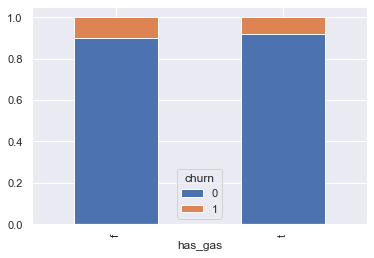

In [870]:
df_gas_churn.T.plot(kind = 'bar', stacked = True)
plt.show()

In [871]:
# Data Normalization 
df_origin_churn = pd.crosstab(final_df['churn'], final_df['origin_up'], normalize = 'columns')
df_origin_churn

origin_up,ewxeelcelemmiwuafmddpobolfuxioce,kamkkxfxxuwbdslkwifmmcsiusiuosws,ldkssxwpmemidmecebumciepifcamkci,lxidpiddsbxsbosboudacockeimpuepw,usapbepcfoloekilkwsdiboslwaxobdp
churn,,,,,
0,1.0,0.939945,0.916227,0.874821,1.0
1,0.0,0.060055,0.083773,0.125179,0.0


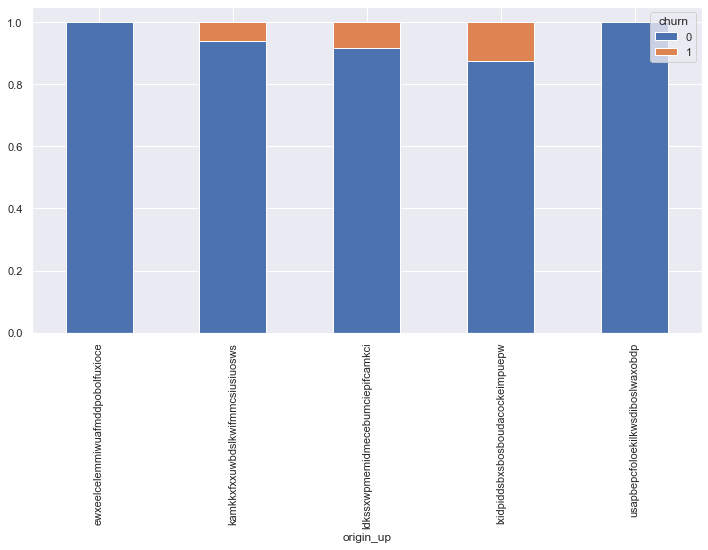

In [872]:

df_origin_churn.T.plot(kind = 'bar', stacked = True, figsize = (12,6))
plt.show()


## Feature Engineering 

Since we have the consumption data for each of the companies for the year 2015, we will create new features using the average of the year, the last six months, and the three months to our model.

In [873]:
mean_year = final_df.groupby(['id']).mean().reset_index()
mean_6m = final_df[final_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = final_df[final_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [874]:
mean_year = mean_year.rename(index=str, columns={"price_off_peak_var": "mean_year_price_off_peak_var",
 "price_peak_var": "mean_year_price_peak_var",
"price_mid_peak_var": "mean_year_price_mid_peak_var",
"price_off_peak_fix": "mean_year_price_off_peak_fix",
"price_peak_fix": "mean_year_price_peak_fix",
"price_mid_peak_fix": "mean_year_price_mid_peak_fix",})
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [875]:
mean_6m = mean_6m.rename(index=str, columns={"price_off_peak_var": "mean_6m_price_off_peak_var",
 "price_peak_var": "mean_6m_price_peak_var",
"price_mid_peak_var": "mean_6m_price_mid_peak_var",
"price_off_peak_fix": "mean_6m_price_off_peak_fix",
"price_peak_fix": "mean_6m_price_peak_fix",
"price_mid_peak_fix": "mean_6m_price_mid_peak_fix",})
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_off_peak_var"] + mean_6m["mean_6m_price_off_peak_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_peak_var"] + mean_6m["mean_6m_price_peak_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_mid_peak_var"] + mean_6m["mean_6m_price_mid_peak_fix"]


In [876]:
mean_3m = mean_3m.rename(index=str, columns={"price_off_peak_var": "mean_3m_price_off_peak_var",
 "price_peak_var": "mean_3m_price_peak_var",
"price_mid_peak_var": "mean_3m_price_mid_peak_var",
"price_off_peak_fix": "mean_3m_price_off_peak_fix",
"price_peak_fix": "mean_3m_price_peak_fix",
"price_mid_peak_fix": "mean_3m_price_mid_peak_fix",})
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_off_peak_var"] + mean_3m["mean_3m_price_off_peak_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_peak_var"] + mean_3m["mean_3m_price_peak_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_mid_peak_var"] + mean_3m["mean_3m_price_mid_peak_fix"]

In [877]:
features = mean_year

In [878]:
features.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,729.06,425.0,0.0,138.95,0.116900,0.100015,40.606701,40.78,43.08,43.08,1.0,81.42,6.0,17.250,0.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,4060.0,0.0,0.0,597.77,0.0,0.0,6.84,0.142065,0.000000,44.311378,0.00,24.42,24.42,1.0,61.58,6.0,13.200,0.0,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.0,0.0,1062.0,1311.16,1062.0,30.0,18.37,0.199230,0.000000,45.806878,213.76,38.58,38.58,2.0,81.61,3.0,13.856,0.0,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,11272.0,0.0,0.0,1671.41,0.0,0.0,18.27,0.144149,0.000000,44.311378,0.00,29.76,29.76,1.0,157.99,6.0,13.200,0.0,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,267414.0,0.0,19394.0,3077.34,1760.0,0.0,144.86,0.118636,0.101750,40.606701,195.20,30.00,30.00,1.0,341.58,3.0,20.000,0.0,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476


### Difference between off-peak prices in December and preceding January

Below is the code created by my colleague to calculate the feature that identifies the difference between the peak prices in December and the previous January. We now recreate this feature and evaluate it by comparison with the other features created to choose those with higher predictive power.

In [879]:
# Group off-peak prices by companies and month
monthly_price_by_id = final_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000


Later we let's merge the feature created by my colleague with the data frame with all the features created and evaluate their correlation.

In the previous nootebook, we explore the data and made a deep dive into the churn by dates. Nonetheless, that exploration did not provide us with any relevant insight but, at same time, the variable previusly created seems to give us more interesting insights.

We will define a variable  contract_tenure = date_end - date_activ 

In [880]:
final_df['contract_tenure']=final_df['date_end']-final_df['date_activ']
final_df['contract_tenure']=final_df['contract_tenure'].apply(lambda x:x.days)
final_df['contract_tenure_year']=final_df['contract_tenure'].apply(lambda x:int(np.round(x/365)))

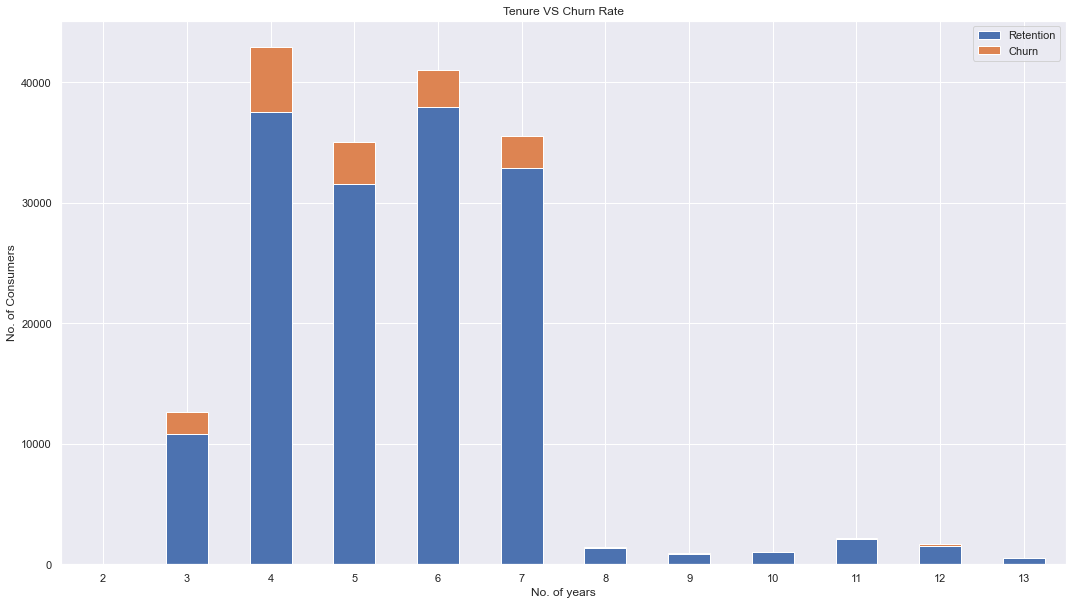

In [881]:
tenure = final_df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate")
# Rename legend
plt.legend(["Retention", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

We can clearly that churn is very low foor companies which jooined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure.

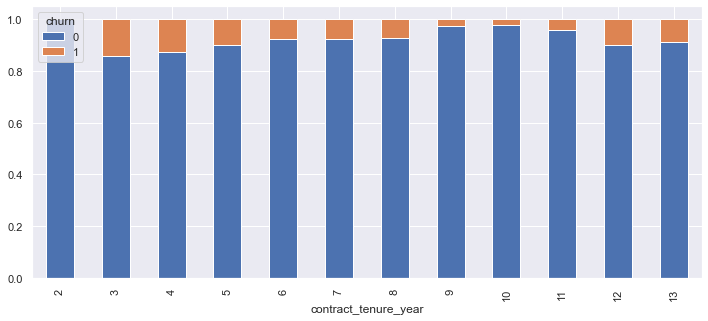

In [882]:
# Data normalization
pd.crosstab(final_df['churn'], final_df['contract_tenure_year'],
            normalize = 'columns').T.plot(kind = 'bar', stacked = True, figsize = (12,5))
plt.show()

We will also transform the dates provided insuch a way that we can make more sense out of those.

- months_activ: Number of months active until reference date (Jan 2016)

- months_to_end: Number of months of the contact left at reference date (Jan 2016)

- months_modif_prod: Number of months since last modification at reference date (Jan 2016)

- months_renewal: Number of months since last renewal at reference date (Jan 2016)

To create the month column we will follow a simple process:

1. Substract the reference date and the column date
2. Convert the timedelta in months
3. Convert to interger (we are not interested in having decimal months)

In [883]:
def convert_months(reference_date, dataframe, column):
    '''
    Input a column with timedeltas and return months
    '''
    time_delta = REFERENCE_DATE - dataframe[column]
    months = (time_delta/np.timedelta64(1, 'M')).astype(int)
    return months

In [884]:
REFERENCE_DATE = datetime.datetime(2016, 1, 1)

In [885]:
final_df["months_activ"] = convert_months(REFERENCE_DATE, final_df, "date_activ")
final_df["months_to_end"] = -convert_months(REFERENCE_DATE, final_df, "date_end")
final_df["months_modif_prod"] = convert_months(REFERENCE_DATE, final_df, "date_modif_prod")
final_df["months_renewal"] = convert_months(REFERENCE_DATE, final_df, "date_renewal")
final_df["price_date"] = convert_months(REFERENCE_DATE, final_df, "price_date")

In [886]:
def plot_churn_by_month(dataframe, column, fontsize_ = 11, rot_ = 0):
    '''
    Plot churn distribution by monthly variable
    '''
    temp = dataframe[[column, 'churn', 'id']].groupby([column, 'churn'])['id'].count().unstack(level = 1)
    temp.plot(kind = 'bar',
             figsize = (30, 15),
             stacked = True,
             rot = rot_,
             title = column);
    # rename legend
    plt.legend(['Retention', 'Churn'], loc = 'upper right')
    # Labels
    plt.ylabel('No. of companies')
    plt.xlabel('No. of months')
    plt.xticks(fontsize = fontsize_)
    plt.show();


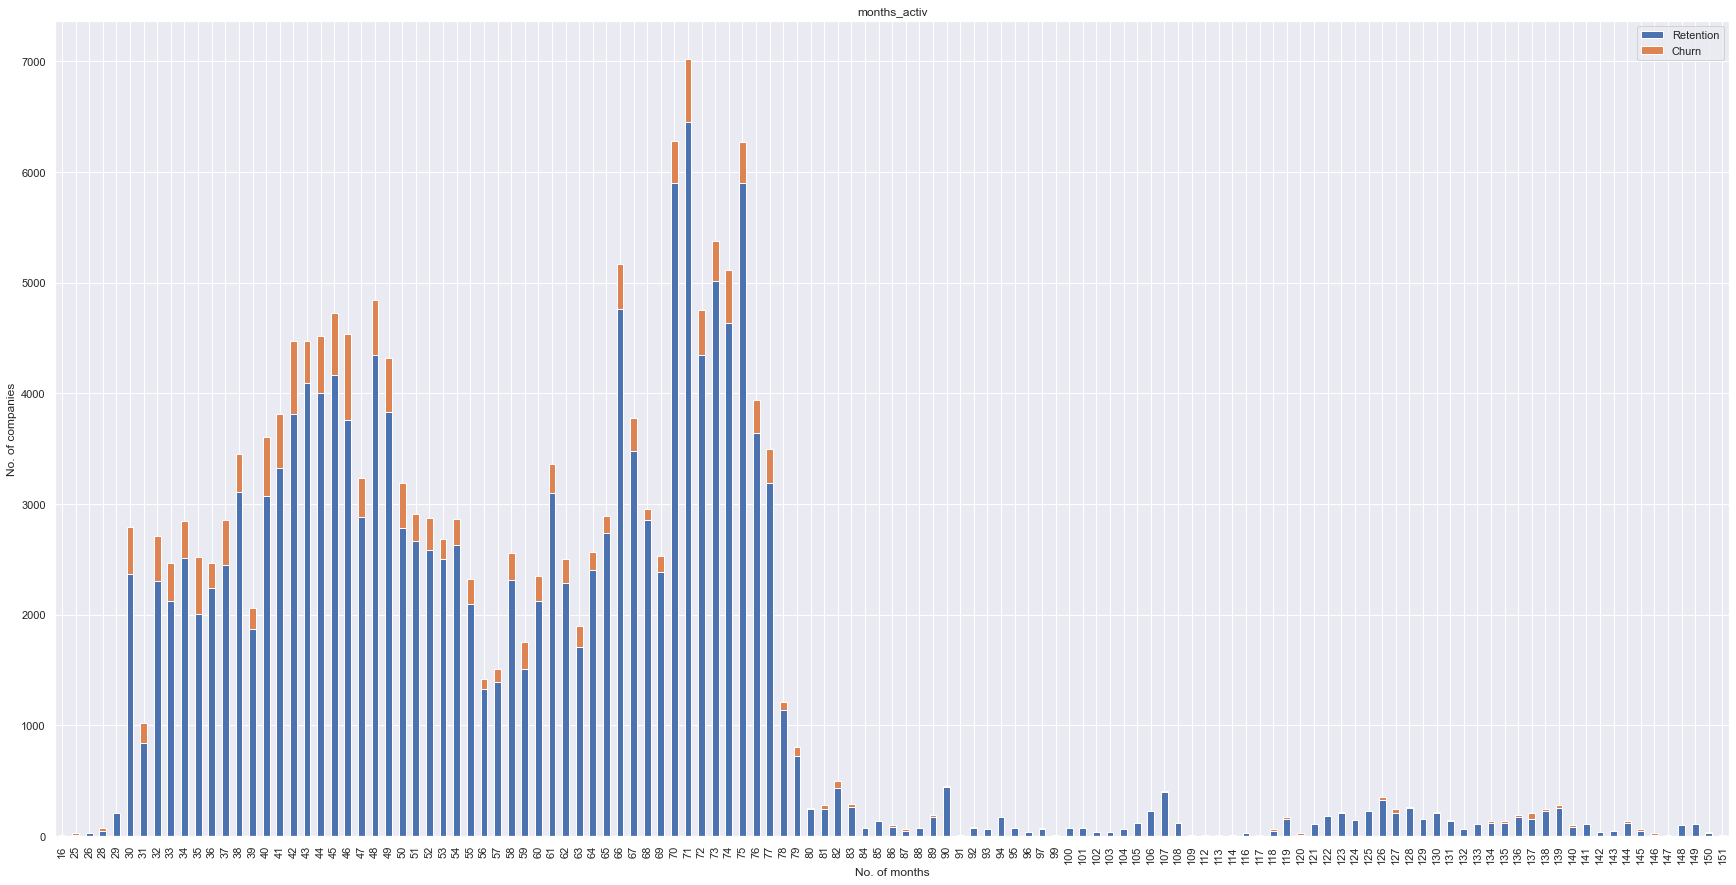

In [887]:
plot_churn_by_month(final_df, 'months_activ', rot_ = 90)

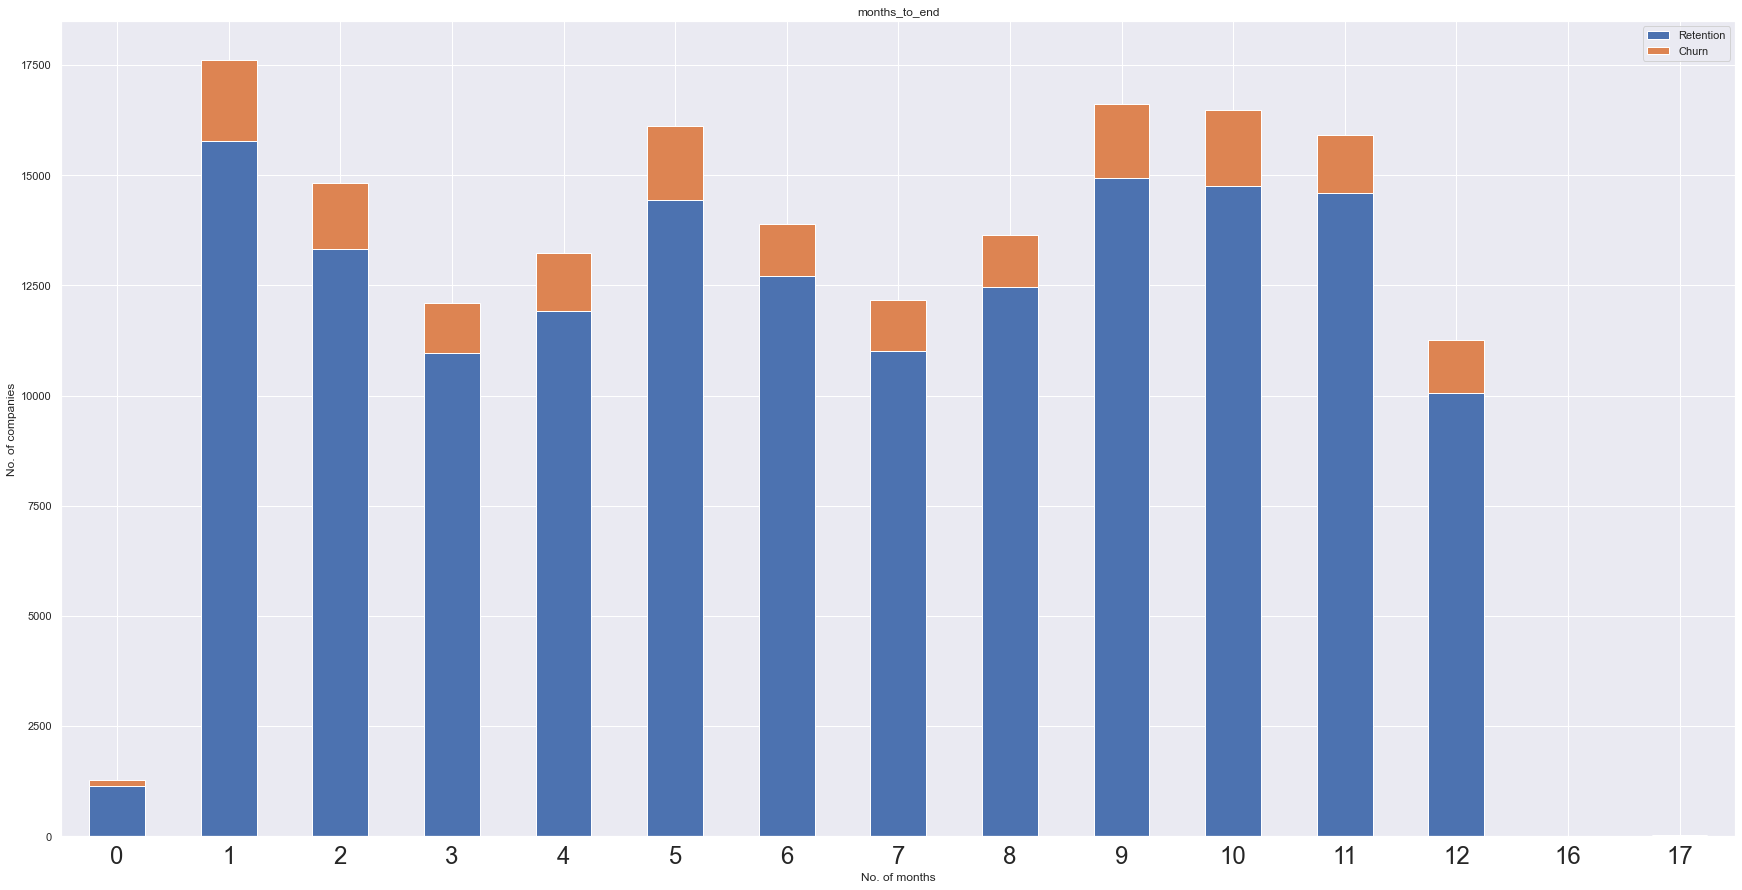

In [888]:
plot_churn_by_month(final_df, 'months_to_end', 24)

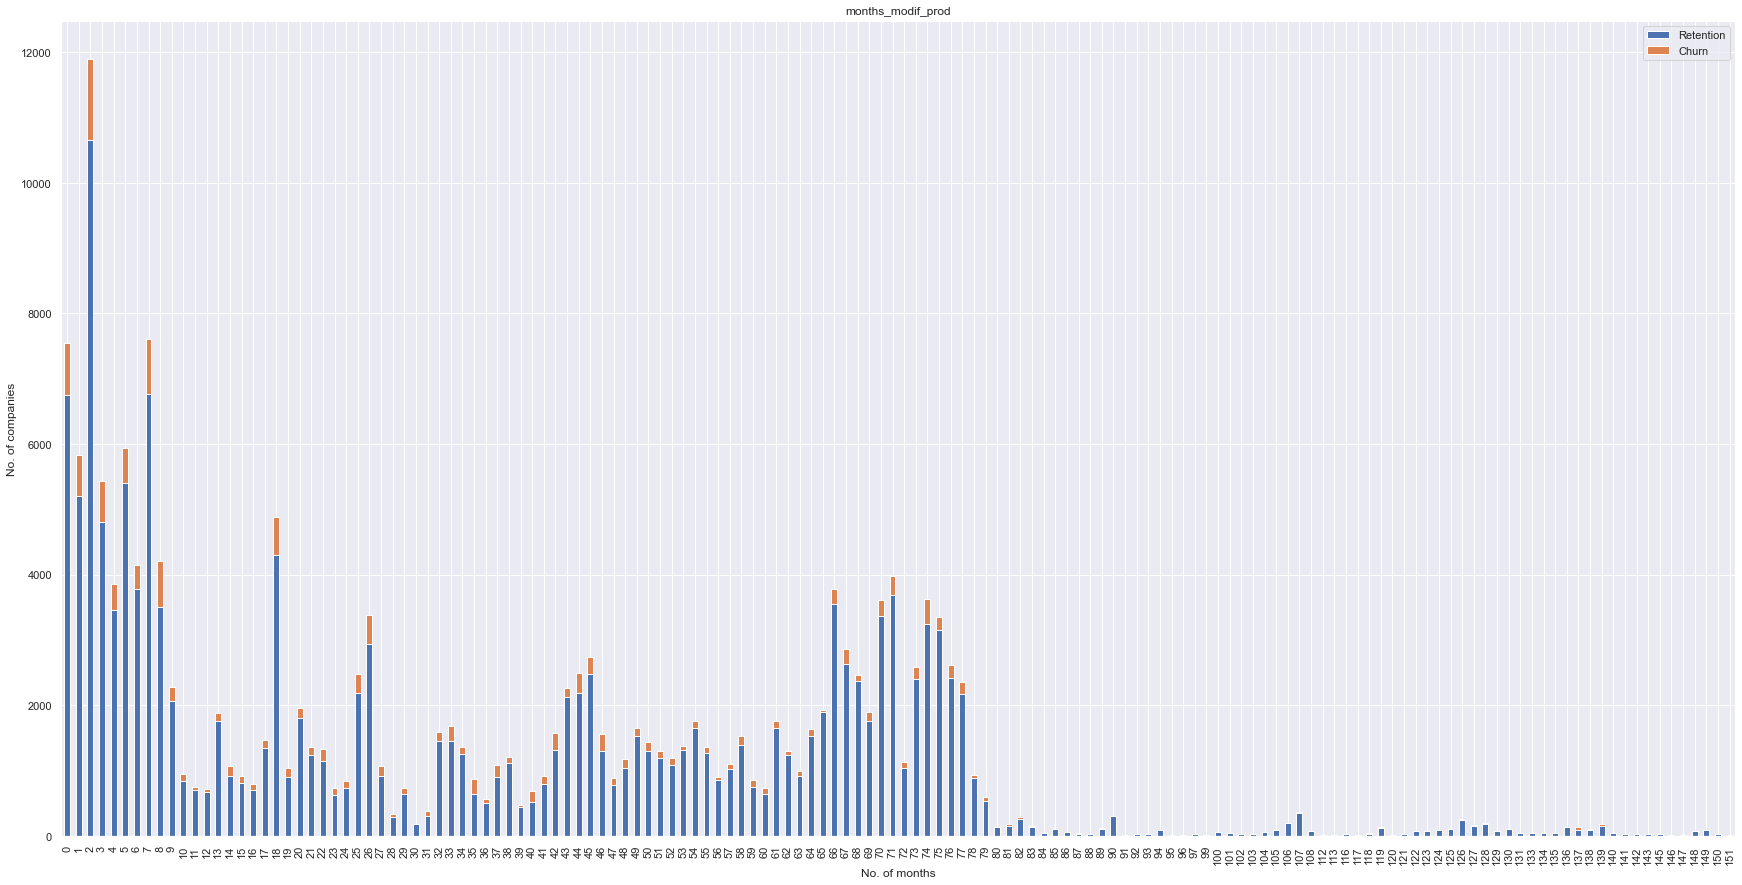

In [889]:
plot_churn_by_month(final_df, 'months_modif_prod', rot_ = 90)

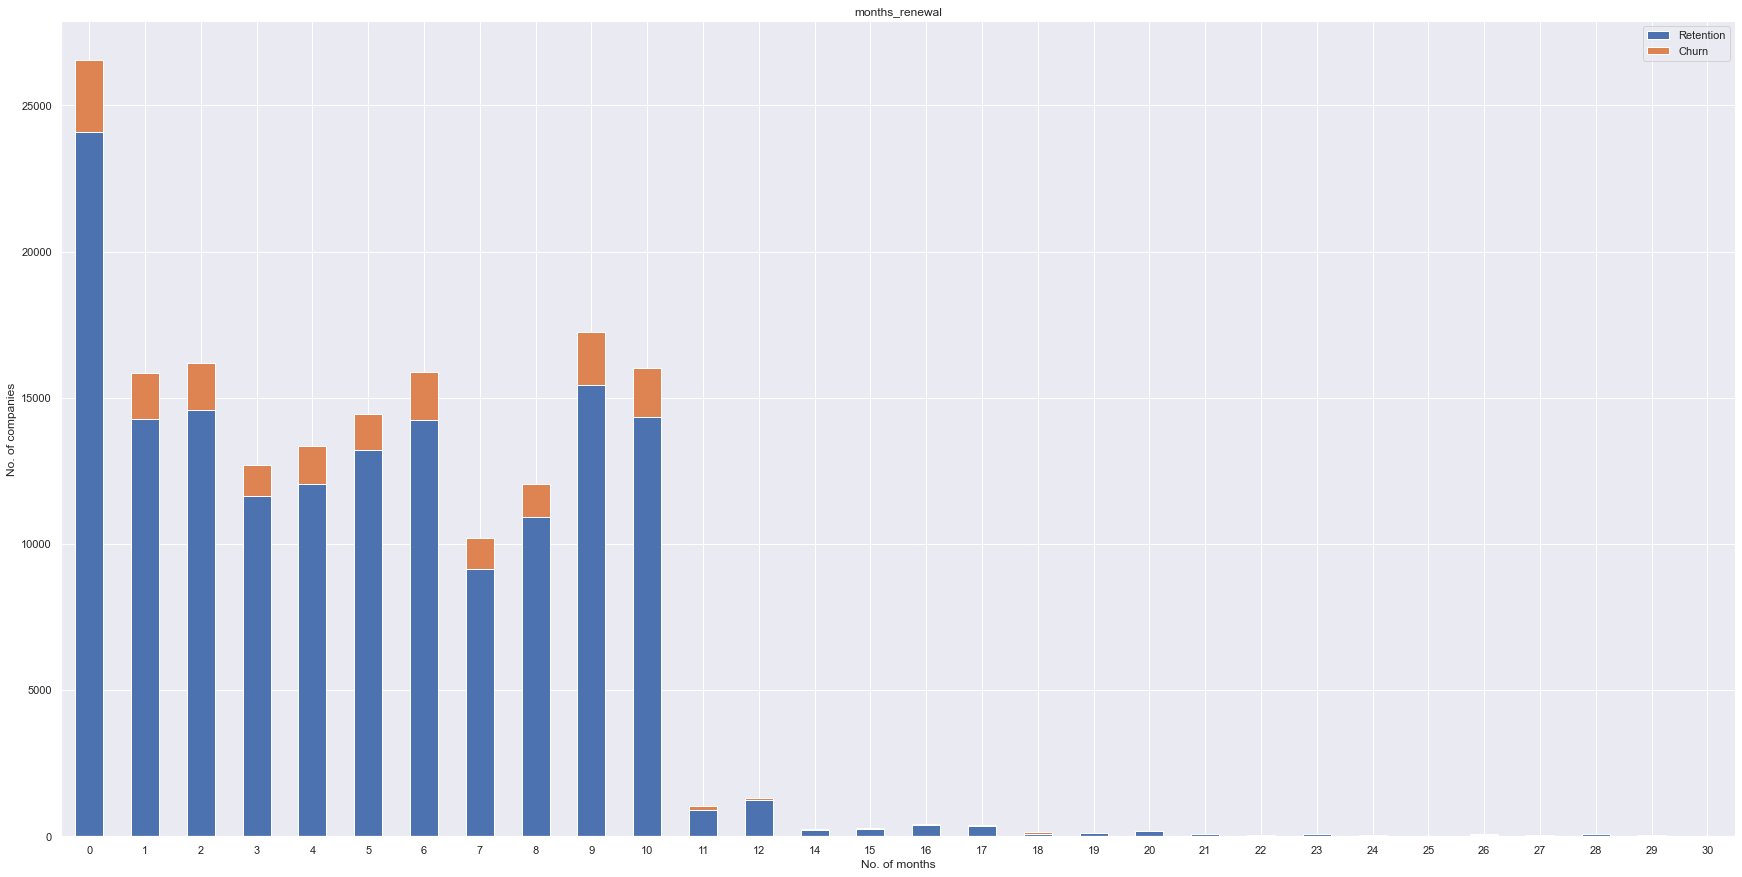

In [890]:
plot_churn_by_month(final_df, 'months_renewal')


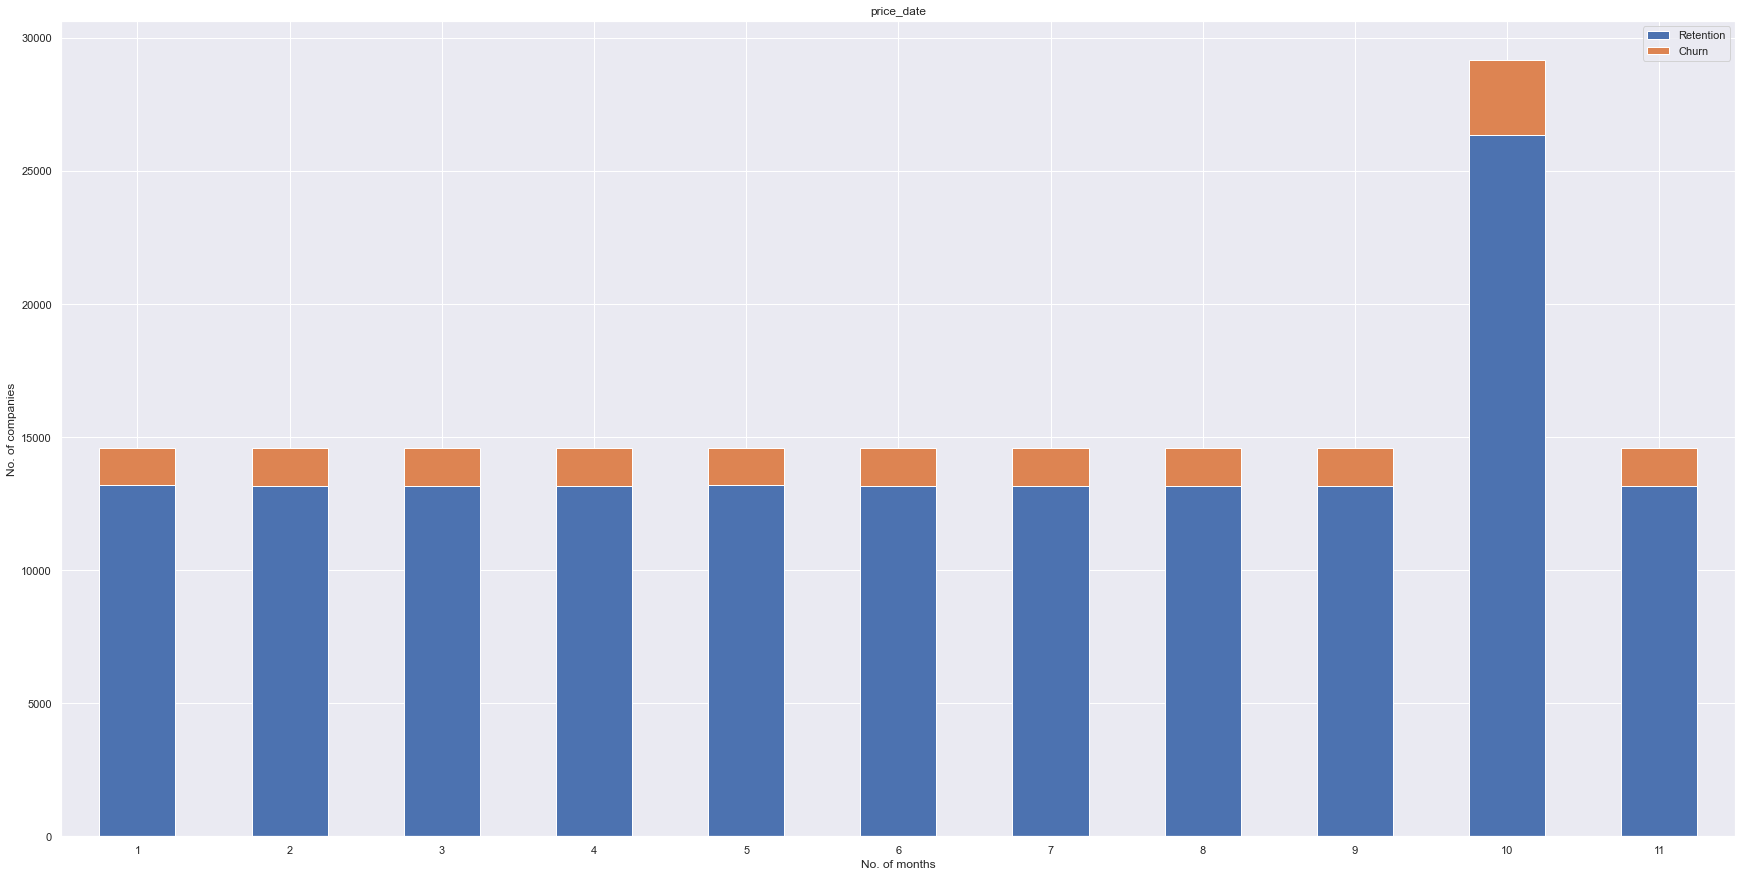

In [891]:
plot_churn_by_month(final_df, 'price_date')

In [892]:
# Remove the date columns
final_df = final_df.drop(columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal','price_date'])

### Transforming boolean data

For the column has_gas, we will replace t for True or 1, and f for False or 0. This process is usually referred as onehot encoding

In [893]:
final_df['has_gas'] = final_df['has_gas'].replace(['t', 'f'], [1, 0])

### Categorical data and dummy variables

When training our model we cannot use string data as such, so we will need to encode it into numerical data. The easiest method is mapping each category to an integer (label encoding) but this will not work because the model will misunderstand the data to be in some kind of order or hierarchy. For that reason we will use a method with dummy variables or onehot encoder

- channel_sales
- origin_up

What we are doing here relatively simple, we want to convert each category into a new dummy variable which will have 0s and 1s depending wheather than entry belongs to that particular category or not.


In [894]:
# create dummy variables
categories_channel = pd.get_dummies(final_df['channel_sales'], prefix = 'channel')

In [895]:
# rename column name for simplicity
categories_channel.columns = [col_name[: 11] for col_name in categories_channel.columns]

In [896]:
final_df.head(2)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096,3,30,5,2,6
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096,3,30,5,2,6


In [897]:
# create dummy variables
categories_origin = pd.get_dummies(final_df['origin_up'], prefix = 'origin')

In [898]:
# rename column name for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]

In [899]:
final_df = pd.merge(final_df, categories_channel, left_index = True, right_index = True)
final_df = pd.merge(final_df, categories_origin, left_index = True, right_index = True)

In [900]:
# finally remove the columns to avoid the dummy variable trap
final_df.drop(columns = ['channel_sales', 'origin_up'], inplace = True)

### Log Transofrmation 

Skewness is not bad per se. Nonetheless, some predictive models make fundamental assumptions related to variables being 'normallyu distributed'. Hence, the model will perform poorly if the data is highly skewed
There are several methods in which we can reduce skewness such as square root, cube root, and log. In this case, we will use a log transformation which is usually recommended for right skewed data.

In [901]:
# apply log10 transformation
final_df['cons_12m'] = np.log10(final_df['cons_12m'] + 1)
final_df['cons_gas_12m'] = np.log10(final_df['cons_gas_12m'] + 1)
final_df['cons_last_month'] = np.log10(final_df['cons_last_month'] + 1)
final_df['forecast_cons_12m'] = np.log10(final_df['forecast_cons_12m'] + 1)
final_df['forecast_cons_year'] = np.log10(final_df['forecast_cons_year'] + 1)
final_df['forecast_meter_rent_12m'] = np.log10(final_df['forecast_meter_rent_12m'] + 1)
final_df['imp_cons'] = np.log10(final_df['imp_cons'] + 1)

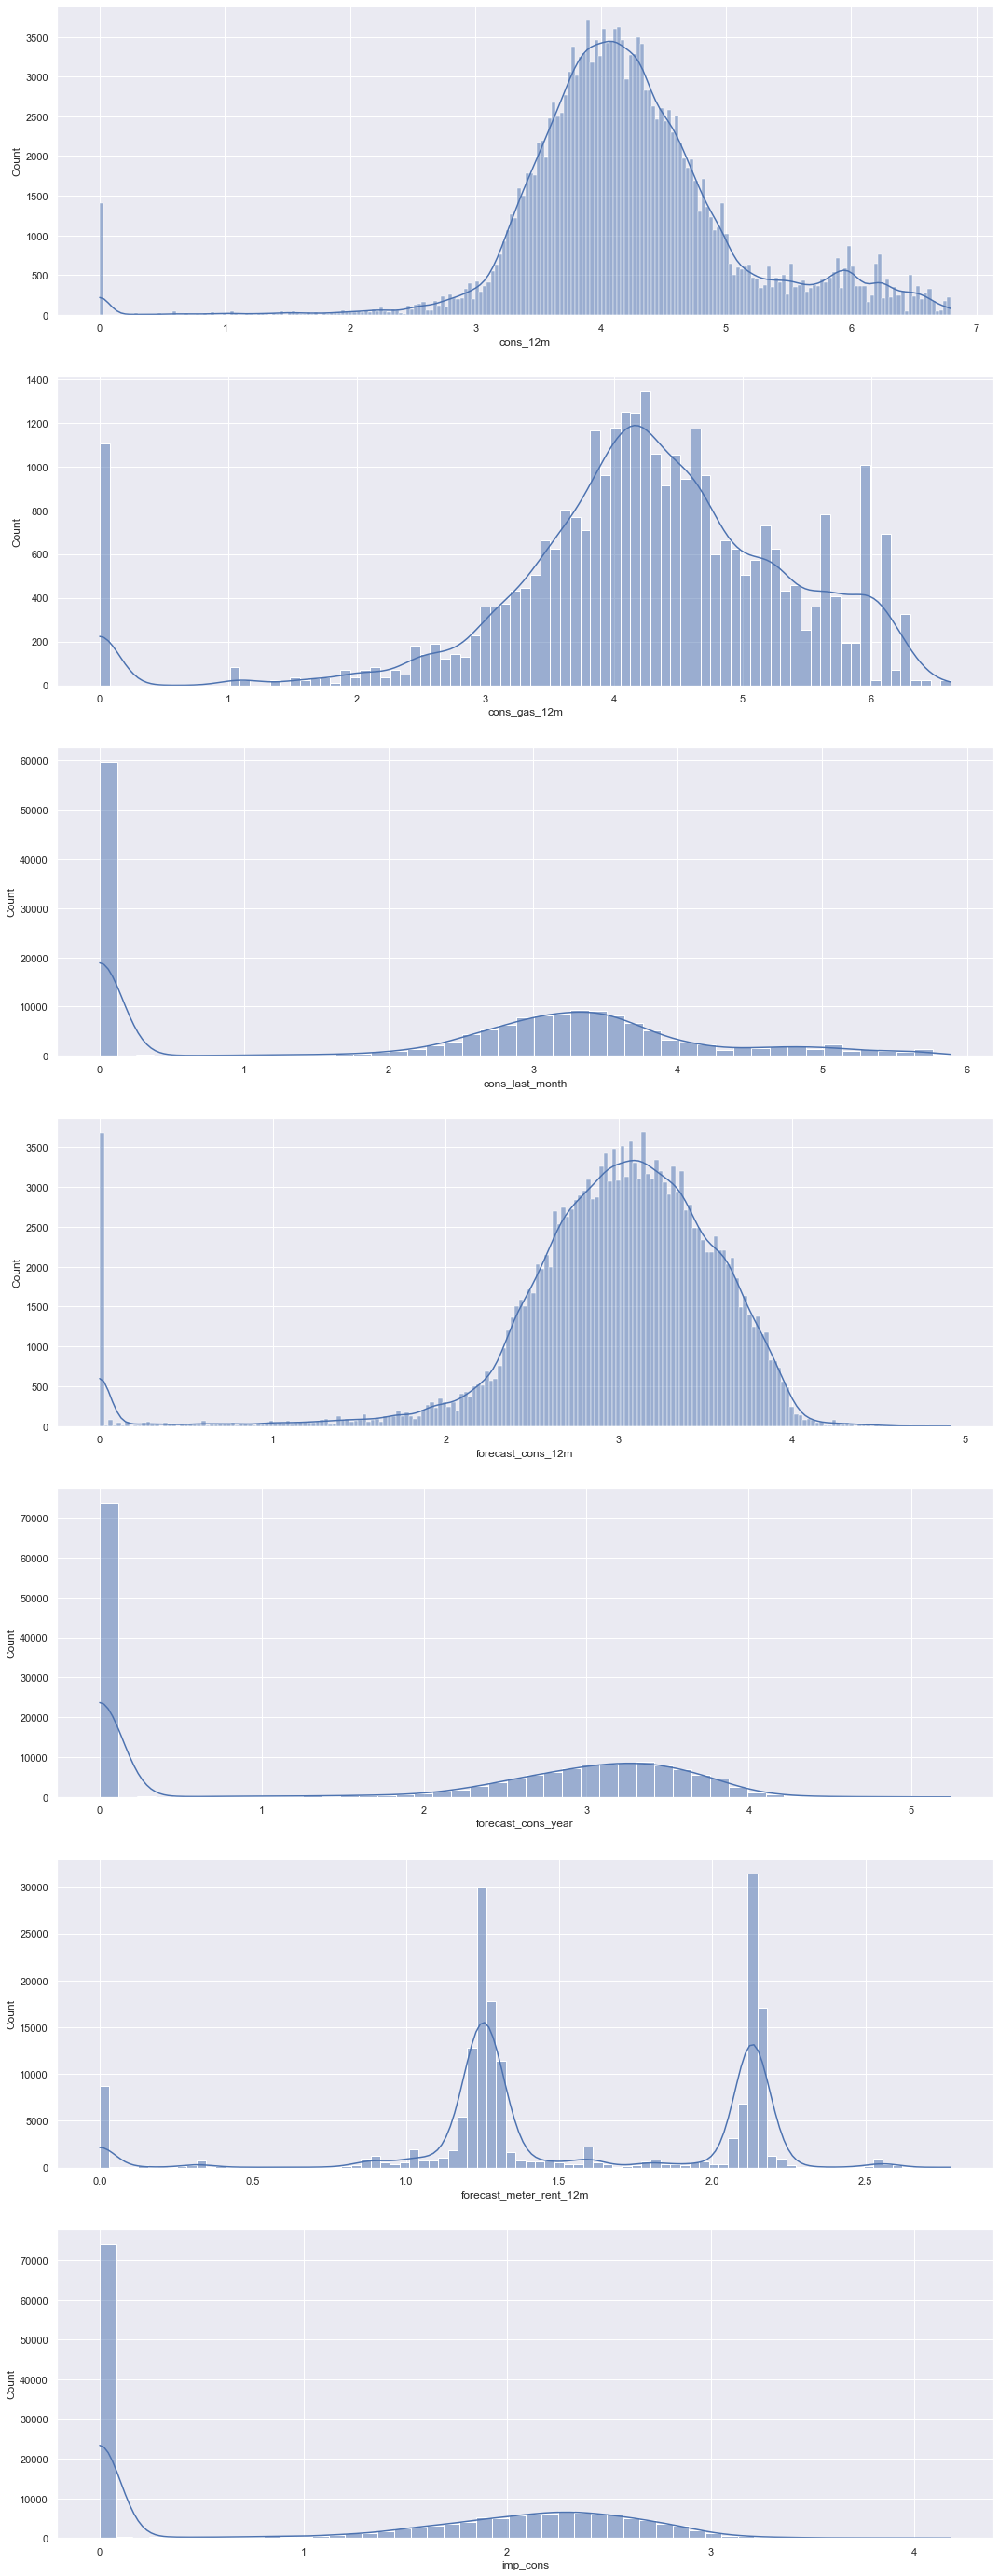

In [902]:
fig, axs = plt.subplots(nrows = 7, figsize = (18, 50));
# Plot Histogram
sns.histplot(final_df['cons_12m'].dropna(), ax = axs[0], kde=True);
sns.histplot(final_df[final_df['has_gas'] == 1]['cons_gas_12m'].dropna(), ax = axs[1], kde=True);
sns.histplot(final_df['cons_last_month'].dropna(), ax = axs[2], kde=True);
sns.histplot(final_df['forecast_cons_12m'].dropna(), ax = axs[3], kde=True);
sns.histplot(final_df['forecast_cons_year'].dropna(), ax = axs[4], kde=True);
sns.histplot(final_df['forecast_meter_rent_12m'].dropna(), ax = axs[5], kde=True);
sns.histplot(final_df['imp_cons'].dropna(), ax = axs[6], kde=True);
plt.show()

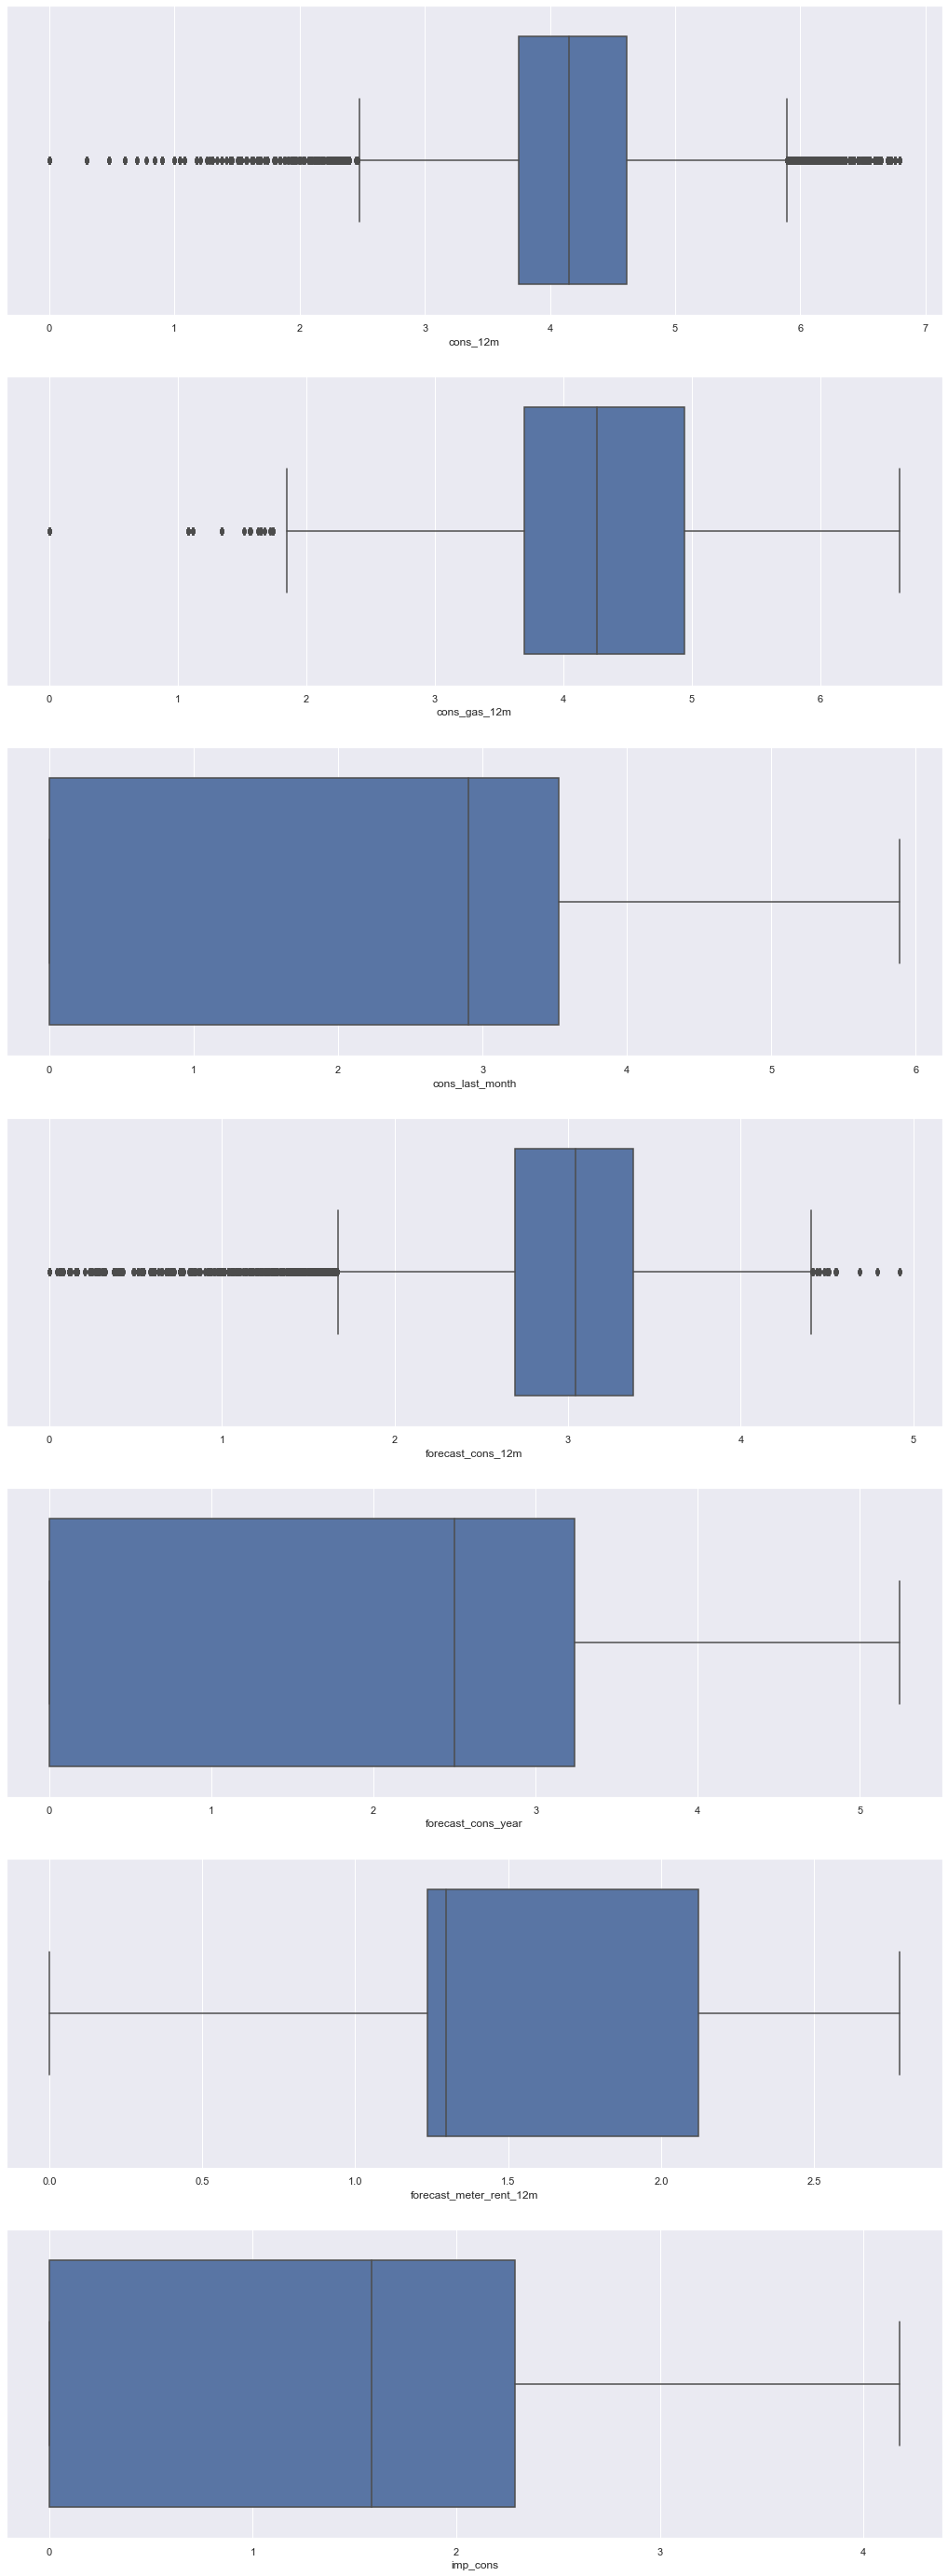

In [903]:
fig, axs = plt.subplots(nrows = 7, figsize = (18, 50));
# Plot Boxplot
sns.boxplot(x = final_df['cons_12m'].dropna(), ax = axs[0]);
sns.boxplot(x = final_df[final_df['has_gas'] == 1]['cons_gas_12m'].dropna(), ax = axs[1]);
sns.boxplot(x = final_df['cons_last_month'].dropna(), ax = axs[2]);
sns.boxplot(x = final_df['forecast_cons_12m'].dropna(), ax = axs[3]);
sns.boxplot(x = final_df['forecast_cons_year'].dropna(), ax = axs[4]);
sns.boxplot(x = final_df['forecast_meter_rent_12m'].dropna(), ax = axs[5]);
sns.boxplot(x = final_df['imp_cons'].dropna(), ax = axs[6]);
plt.show()

The distribution looks much closer to normal distributions now
Notice how the standard deviation std has changed
From the boxplots we can still see move values are quite far from the range (outliers). We will deal with them later.

## High Correlation Variables

Calculate the correlation of the variables

We can remove highly correlated variables.
Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicteed from the others with a high degree of accuracy. This can lead to skewed or misleading results. Luckily, decision trees and boosted tree algorithms are immune to multicollinearity by nature, When they decide to split, the tree will choose only one of the perfectly correlated features. However, other algorithms like Logistic Regression or linear Regression are not immune to that problem and should be fixed before training the model.

In [904]:
features.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,729.06,425.0,0.0,138.95,0.116900,0.100015,40.606701,40.78,43.08,43.08,1.0,81.42,6.0,17.250,0.0,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,4060.0,0.0,0.0,597.77,0.0,0.0,6.84,0.142065,0.000000,44.311378,0.00,24.42,24.42,1.0,61.58,6.0,13.200,0.0,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.0,0.0,1062.0,1311.16,1062.0,30.0,18.37,0.199230,0.000000,45.806878,213.76,38.58,38.58,2.0,81.61,3.0,13.856,0.0,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,11272.0,0.0,0.0,1671.41,0.0,0.0,18.27,0.144149,0.000000,44.311378,0.00,29.76,29.76,1.0,157.99,6.0,13.200,0.0,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,267414.0,0.0,19394.0,3077.34,1760.0,0.0,144.86,0.118636,0.101750,40.606701,195.20,30.00,30.00,1.0,341.58,3.0,20.000,0.0,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476


In [905]:
features = features.drop(columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m',
                                    'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
                                   'forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak',
                                   'imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin',
                                   'num_years_antig','pow_max','churn'])

In [906]:
features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476


In [907]:
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000


In [908]:
# I add the feature created by my colleague to the data frame with all the other features 
features['offpeak_diff_dec_january_energy'] = diff ['offpeak_diff_dec_january_energy']
features['offpeak_diff_dec_january_power'] = diff ['offpeak_diff_dec_january_power'] 

In [909]:
# calculate correlation of variables
correlation = features.corr()

<AxesSubplot:>

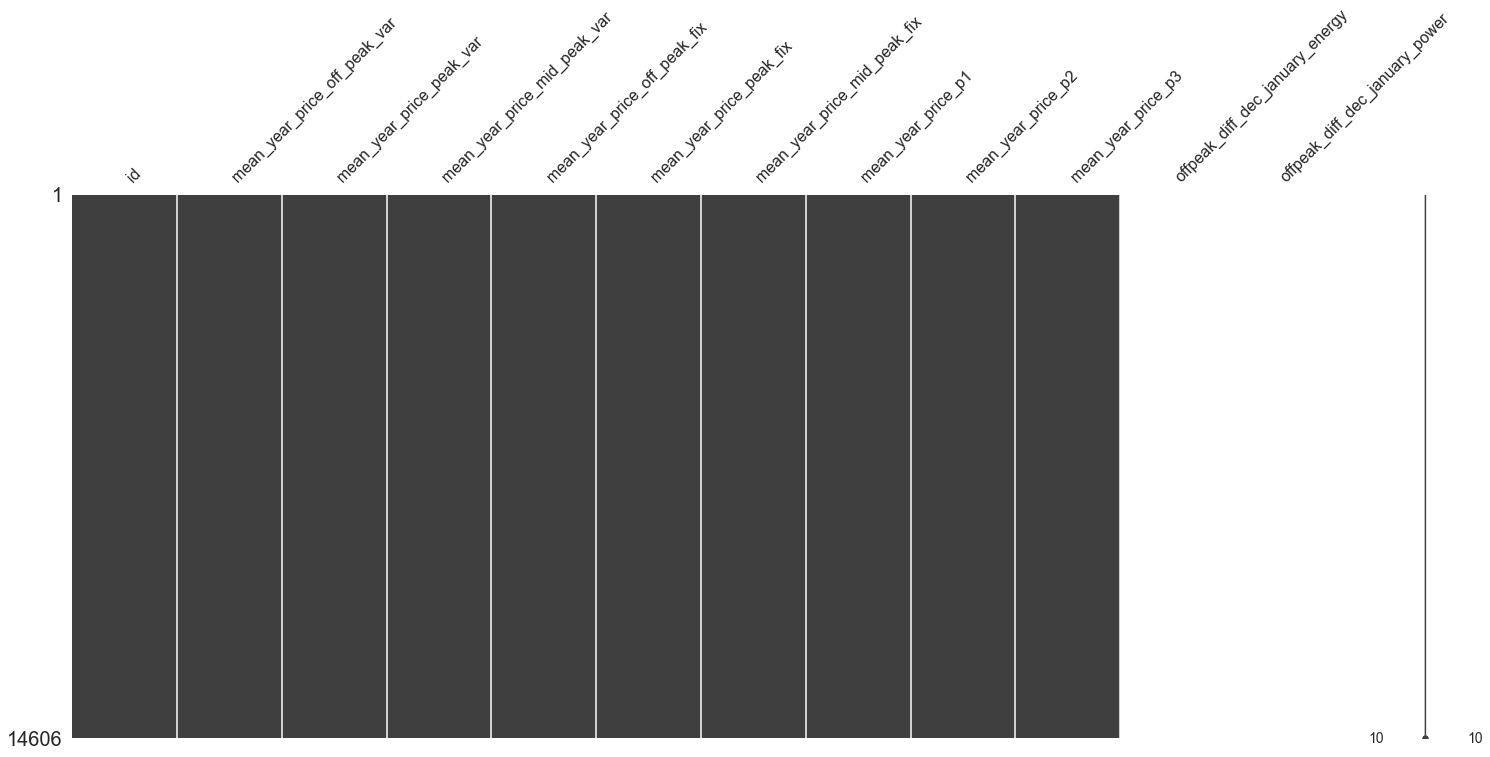

In [910]:
msno.matrix(features)

<AxesSubplot:>

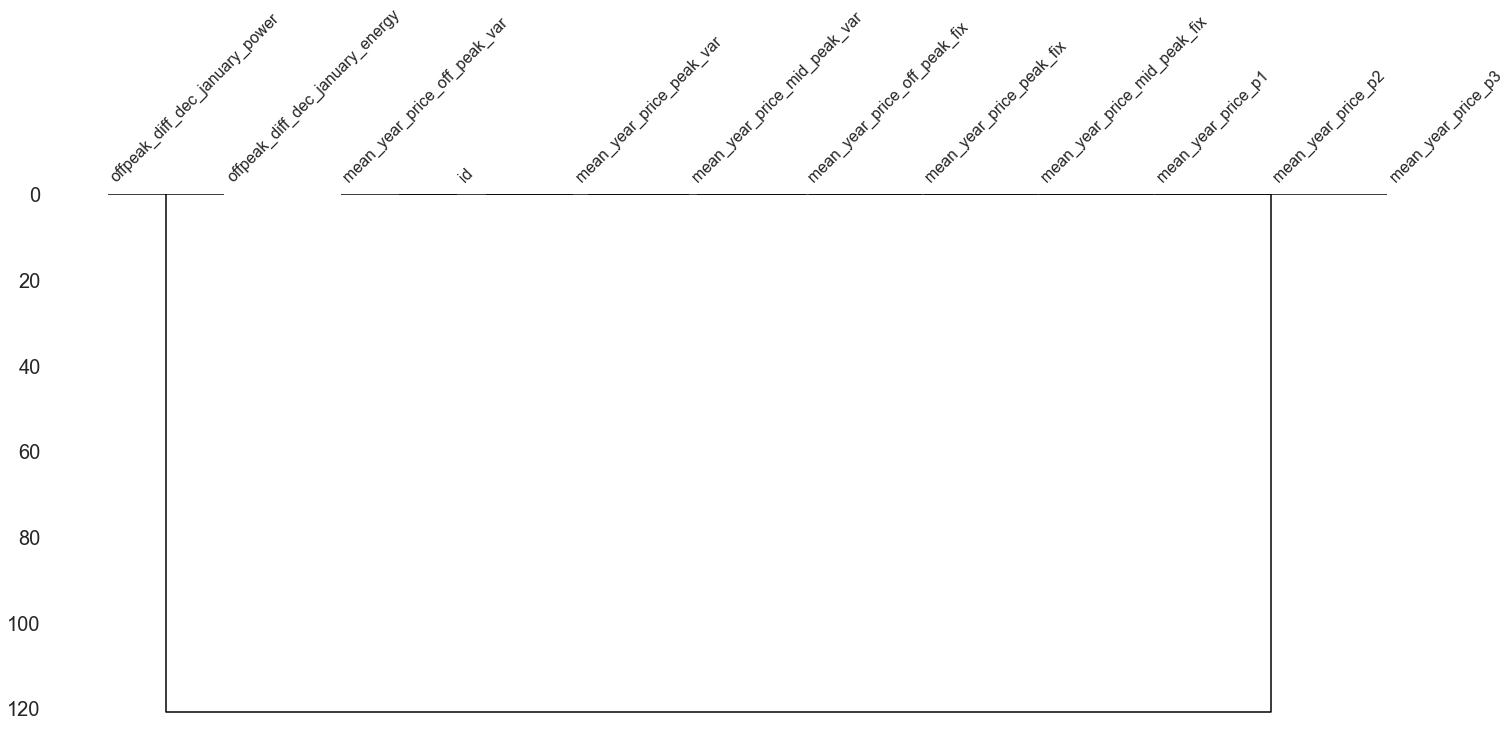

In [911]:
msno.dendrogram(features)

As we can see from the correlation matrix and the dendrogram above, the feature calculated by my colleague partly explains what has already been explained by the other variables created, so let us proceed with its elimination from the data frame features.

In [912]:
# Delate columns 
features = features.drop(columns = ['offpeak_diff_dec_january_energy', 'offpeak_diff_dec_january_power'])

In [913]:
# calculate correlation of variables
correlation = features.corr()

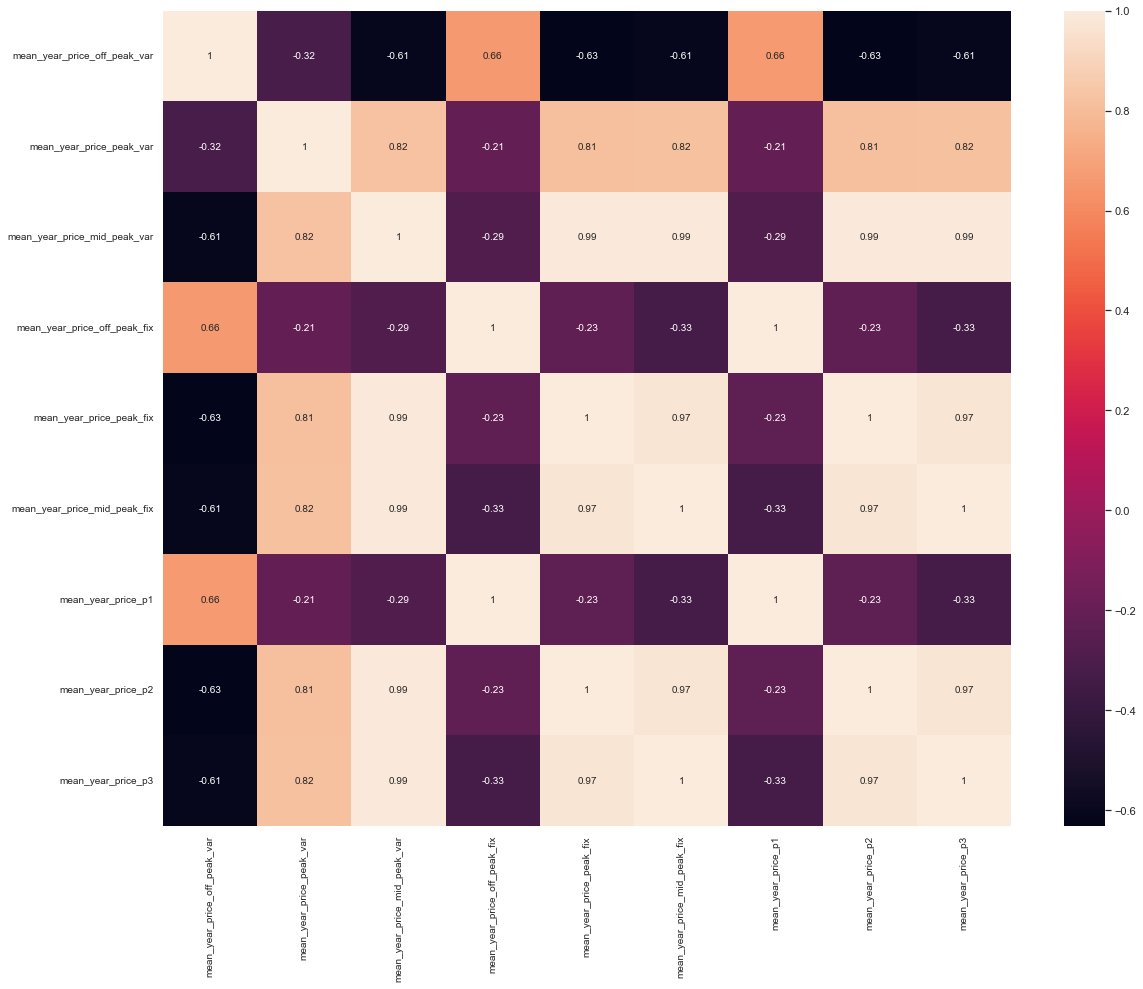

In [914]:
# Plot correlation
plt.figure(figsize = (19, 15))
sns.heatmap(correlation, 
            xticklabels = correlation.columns.values, 
           yticklabels = correlation.columns.values,
           annot = True,
           annot_kws = {'size': 10})
# Axis ticks size
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


In [915]:
# calculate correlation of variables
correlation = final_df.corr()

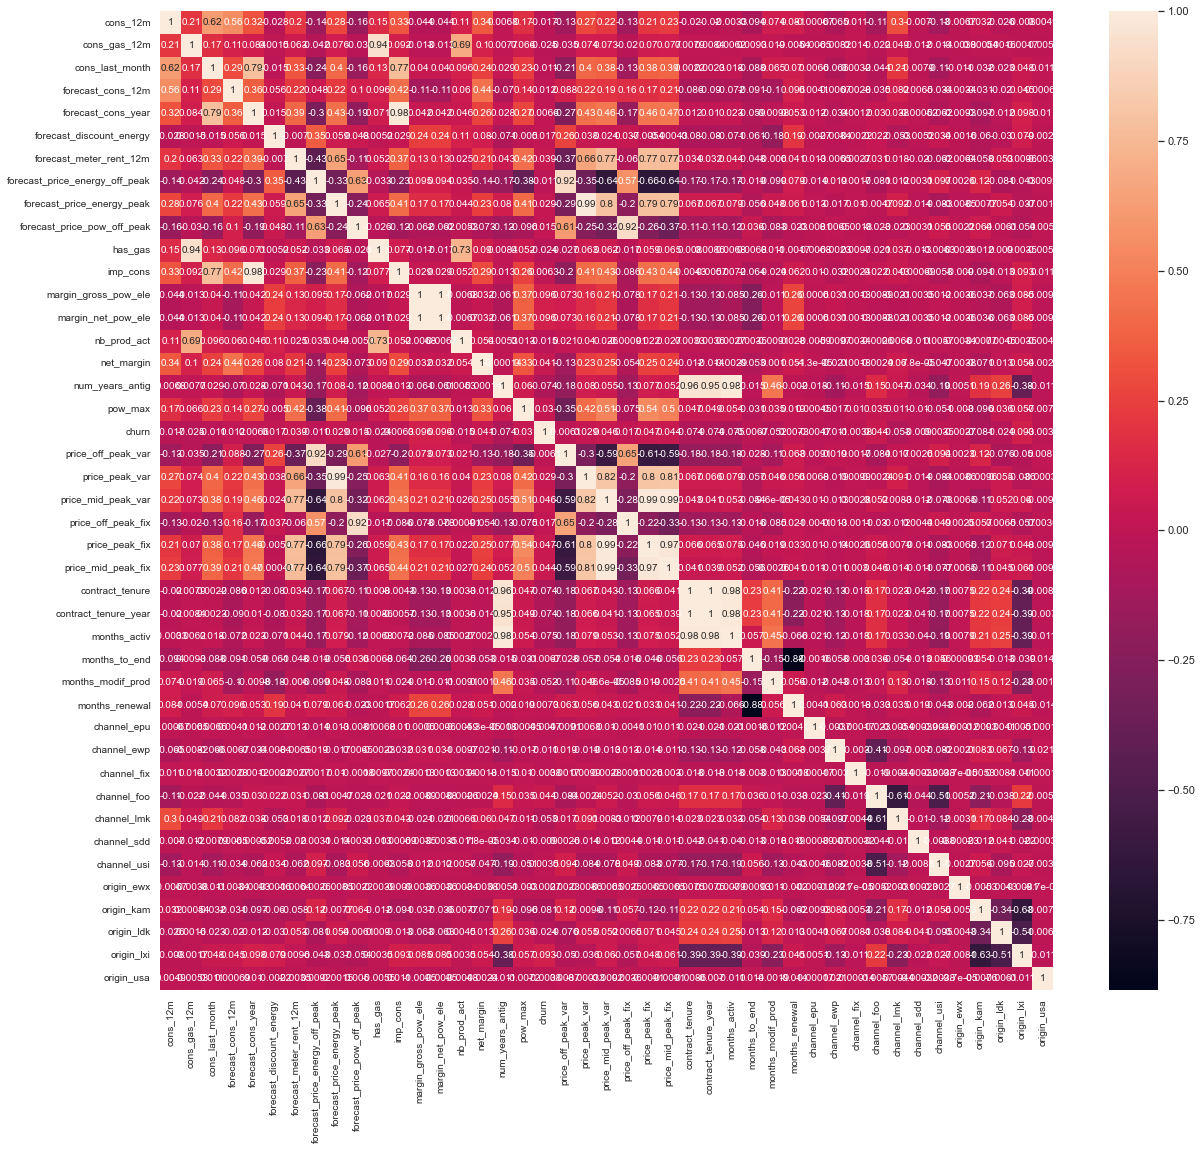

In [916]:
# Plot correlation
plt.figure(figsize = (20, 18))
sns.heatmap(correlation, 
            xticklabels = correlation.columns.values,
           yticklabels = correlation.columns.values,
           annot = True,
           annot_kws = {'size': 10})
# Axis ticks size
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In [917]:
final_df.drop(columns = ['num_years_antig', 'forecast_cons_year'], inplace = True)

<AxesSubplot:>

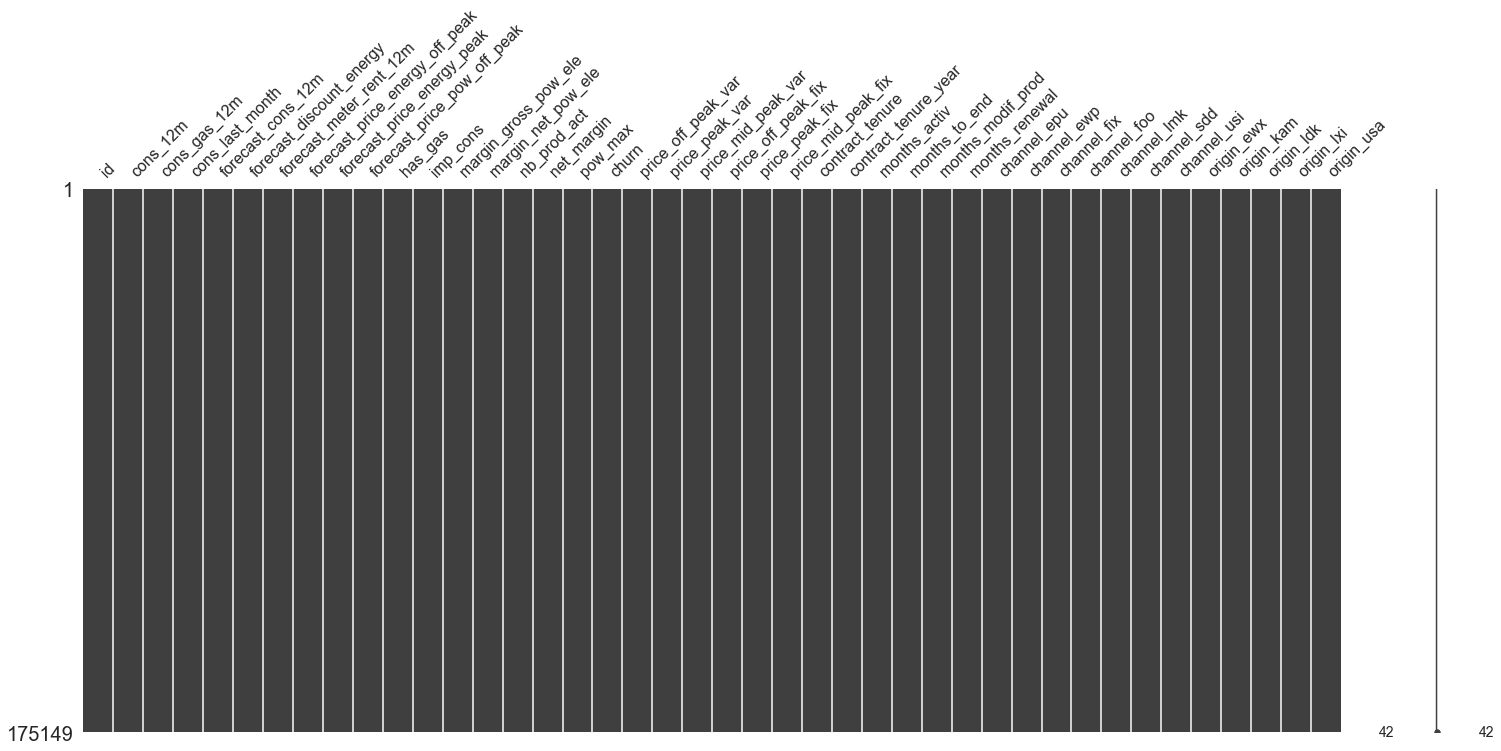

In [918]:
msno.matrix(final_df)

<AxesSubplot:>

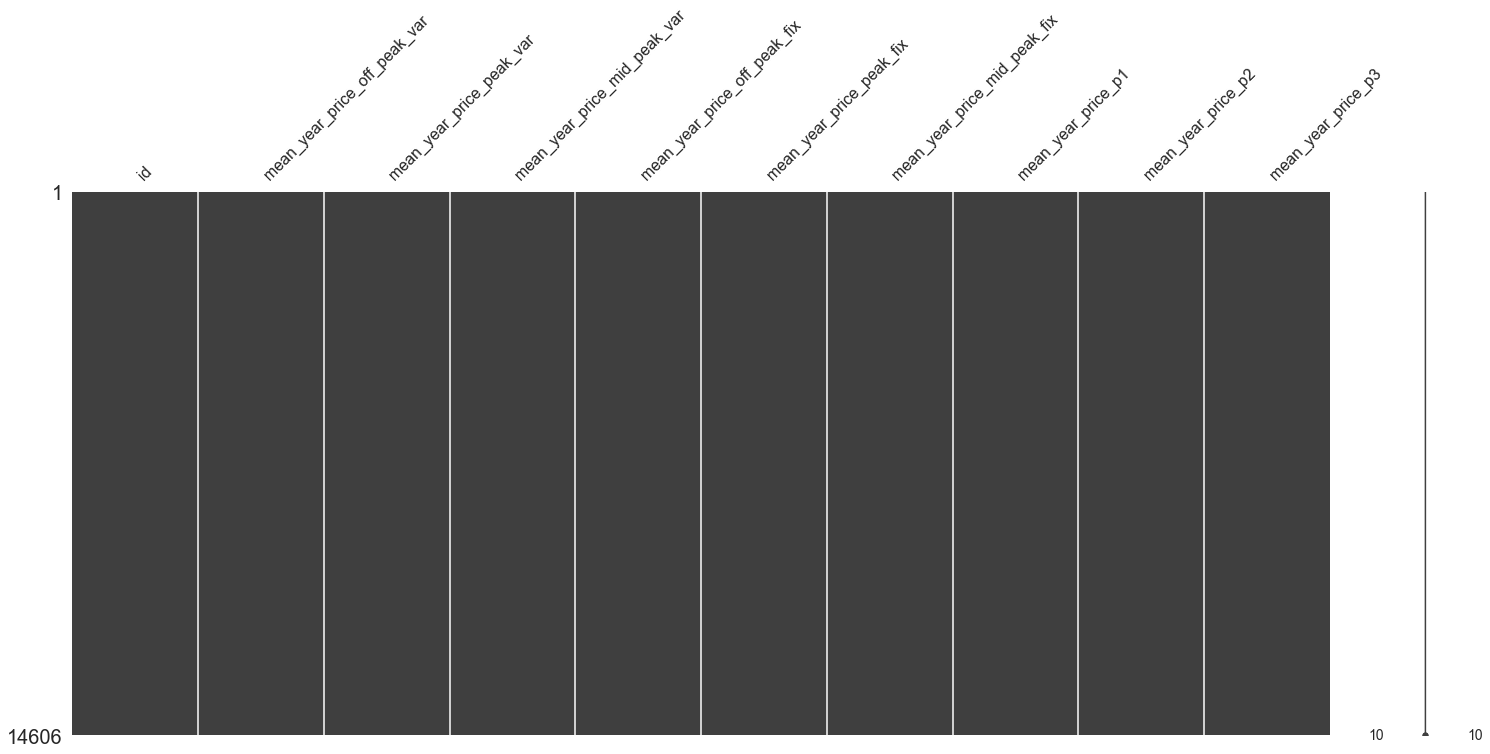

In [919]:
msno.matrix(features)

### Removing Outliers

as we identified during the exploratory phase, the consumption data has several outliers. We are going to remove those outliers.

What are the criteria to identify an outlier

The most common way to identify an outlier are:

1. Data point that falls outside of 1.5 times of an iterquartile range above the 3rd quartile and below the 1st quartile
2. Data point that falls outside of 3 standard deviations

Once, we have identified the outlier, What do we do with the outliers?
There are several ways to handle with those outliers such as removing them (this works well for massive datasets) or replacing them with sensible data (works better when the dataset is not that big)
We will replace the outliers with mean (average of the values excluding outliers).

As we identified during the exploratory phase, and when carrying out the log transformation, the dataset has several outliers.

In [920]:
def replace_outliers_z_score(dataframe, column, Z = 3):
    '''
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values
    
    Parameters
    ----------
    dataframe: pandas dataframe
        Contains the data where the outliers are to be found
    column: str
        Usually a string with the name of the column
        
    Returns
    -------
    Dataframe
        With ouotliers under the lower the above the upper bound removed
    '''
    from scipy.stats import zscore
    df = dataframe.copy(deep = True)
    df.dropna(inplace = True, subset = [column])
    
    # Calculate mean withuot outliers
    df['zscore'] = zscore(df[column])
    df.dropna(inplace = True, subset = [column])
    
    # Calculate mean without outliers
    df['zscore'] = zscore(df[column])
    mean_ = df[(df['zscore'] > -Z)&(df['zscore'] < Z)][column].mean()
    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe['zscore'] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe['zscore'] < -Z)&(dataframe['zscore'] > Z)].shape[0]
    dataframe.loc[(dataframe['zscore'] < -Z)|(dataframe['zscore'] > Z), column] = mean_
    
    # print message
    print('Replaced:', no_outliers, 'outliers in ', column)
    return dataframe.drop(columns = 'zscore')

In [921]:
for c in features.columns:
    if c != 'id':
        features = replace_outliers_z_score(features, c)

Replaced: 0 outliers in  mean_year_price_off_peak_var
Replaced: 0 outliers in  mean_year_price_peak_var
Replaced: 0 outliers in  mean_year_price_mid_peak_var
Replaced: 0 outliers in  mean_year_price_off_peak_fix
Replaced: 0 outliers in  mean_year_price_peak_fix
Replaced: 0 outliers in  mean_year_price_mid_peak_fix
Replaced: 0 outliers in  mean_year_price_p1
Replaced: 0 outliers in  mean_year_price_p2
Replaced: 0 outliers in  mean_year_price_p3


In [922]:
features.reset_index(drop = True, inplace = True)

In [923]:
def _find_outliers_iqr(datarame, column):
    '''
    Find outliers using the 1.5*IQR rule
    
    Parameters
    ----------
    dataframe: pandas dataframe
        Contains the data where the outliers are to be found
    column: str
        Usually a string with the name of the column
    
    Returns
    -------
    Dict
        With the values of the IQR, lower_bound and upper_bound
    '''
    col = sorted(dataframe[column])
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    
    results = {'iqr': iqr,
              'lower_bound': lower_bound,
              'upper_bound': upper_bound}
    return results

def remove_outliers_iqr(dataframe, column):
    '''
    Remove outliers using the 1.5*IQR rule.
    
    Parameters
    ----------
    dataframe: pandas dataframe
        Contains the data where the outliers are to be found
    column: str
        Usually a string with the name of the column
        
    Returns
    -------
    DataFrame
        With outliers under the lower and above the upper bound removed
    '''
    outliers = _find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers['lower_bound'])|(dataframe[column] > outliers['upper_bound'])]\
    .shape
    dataframe = dataframe[(dataframe[column] > outliers['lower_bound'])&(dataframe[column] < outliers['upper_bound'])]
    print('Removed:', removed[0], 'outliers')
    return dataframe

def remove_outliers_z_score(dataframe, column, Z = 3):
    '''
    Remove outliers using the Z score. Values with more than 3 are removed.
    
    Parameters
    ----------
    dataframe: pandas dataframe
        Contains the data where the outliers are to be found
    column: str
        Usually a string with the name of the column
        
    Returns
    -------
    Dataframe
        With outliers under the lowerr and above the upper bound removed
    '''
    from scipy.stats import zscore
    
    dataframe['zscore'] = zscore(dataframe[column])
    
    removed = dataframe[(dataframe['zscore'] < -Z)|(dataframe['zscore'] > Z)]\
    .shape
    
    dataframe = dataframe[(dataframe['zscore'] > -Z)&(dataframe['zscore'] < Z)]
    print('Removed:', removed[0], 'outliers of ', column)
    return dataframe.drop(columns = 'zscore')

def replace_outliers_z_score(dataframe, column, Z = 3):
    '''
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with mean values.
    
    Parameters
    ----------
    dataframe: pandas dataframe
        Contains the data where the outliers are to be found
    column: str
        Usually a string with name of the column
        
    Returns
    -------
    Dataframe
        With outliers under the lower and above the upper bound removed
    '''
    from scipy.stats import zscore
    
    df = dataframe.copy(deep = True)
    df.dropna(inplace = True, subset = [column])
    # Calculate mean without uotliers
    df['zscore'] = zscore(df[column])
    mean_ = df[(df['zscore'] > -Z)&(df['zscore'] < Z)][column].mean()
    # Replace with mean values
    no_outliers = dataframe[column].isnull().sum() 
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe['zscore'] = zscore(dataframe[column])
    dataframe.loc[(dataframe['zscore'] < -Z)|(dataframe['zscore'] > Z), column] = mean_
    # print message
    print('Replaced:', no_outliers, ' outliers in ', column)
    return dataframe.drop(columns = 'zscore')

In [924]:
dummy_col = ['id', 'has_gas', 'nb_prod_act', 'churn', 'tenure', 'channel_epu',
       'channel_ewp', 'channel_fix', 'channel_foo', 'channel_lmk',
       'channel_sdd', 'channel_usi', 'origin_ewx', 'origin_kam', 'origin_ldk',
       'origin_lxi', 'origin_usa', 'activity_apd', 'activity_ckf',
       'activity_clu', 'activity_cwo', 'activity_fmw', 'activity_kkk',
       'activity_kwu', 'activity_sfi', 'activity_wxe']

for c in final_df.columns:
    if c not in dummy_col:
        train = replace_outliers_z_score(final_df, c)

Replaced: 0  outliers in  cons_12m
Replaced: 0  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 0  outliers in  forecast_cons_12m
Replaced: 0  outliers in  forecast_discount_energy
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 0  outliers in  forecast_price_energy_off_peak
Replaced: 0  outliers in  forecast_price_energy_peak
Replaced: 0  outliers in  forecast_price_pow_off_peak
Replaced: 0  outliers in  imp_cons
Replaced: 0  outliers in  margin_gross_pow_ele
Replaced: 0  outliers in  margin_net_pow_ele
Replaced: 0  outliers in  net_margin
Replaced: 0  outliers in  pow_max
Replaced: 0  outliers in  price_off_peak_var
Replaced: 0  outliers in  price_peak_var
Replaced: 0  outliers in  price_mid_peak_var
Replaced: 0  outliers in  price_off_peak_fix
Replaced: 0  outliers in  price_peak_fix
Replaced: 0  outliers in  price_mid_peak_fix
Replaced: 0  outliers in  contract_tenure
Replaced: 0  outliers in  contract_tenure_year
Replaced: 0  outliers in  

In [925]:
final_df.reset_index(drop = True, inplace = True)

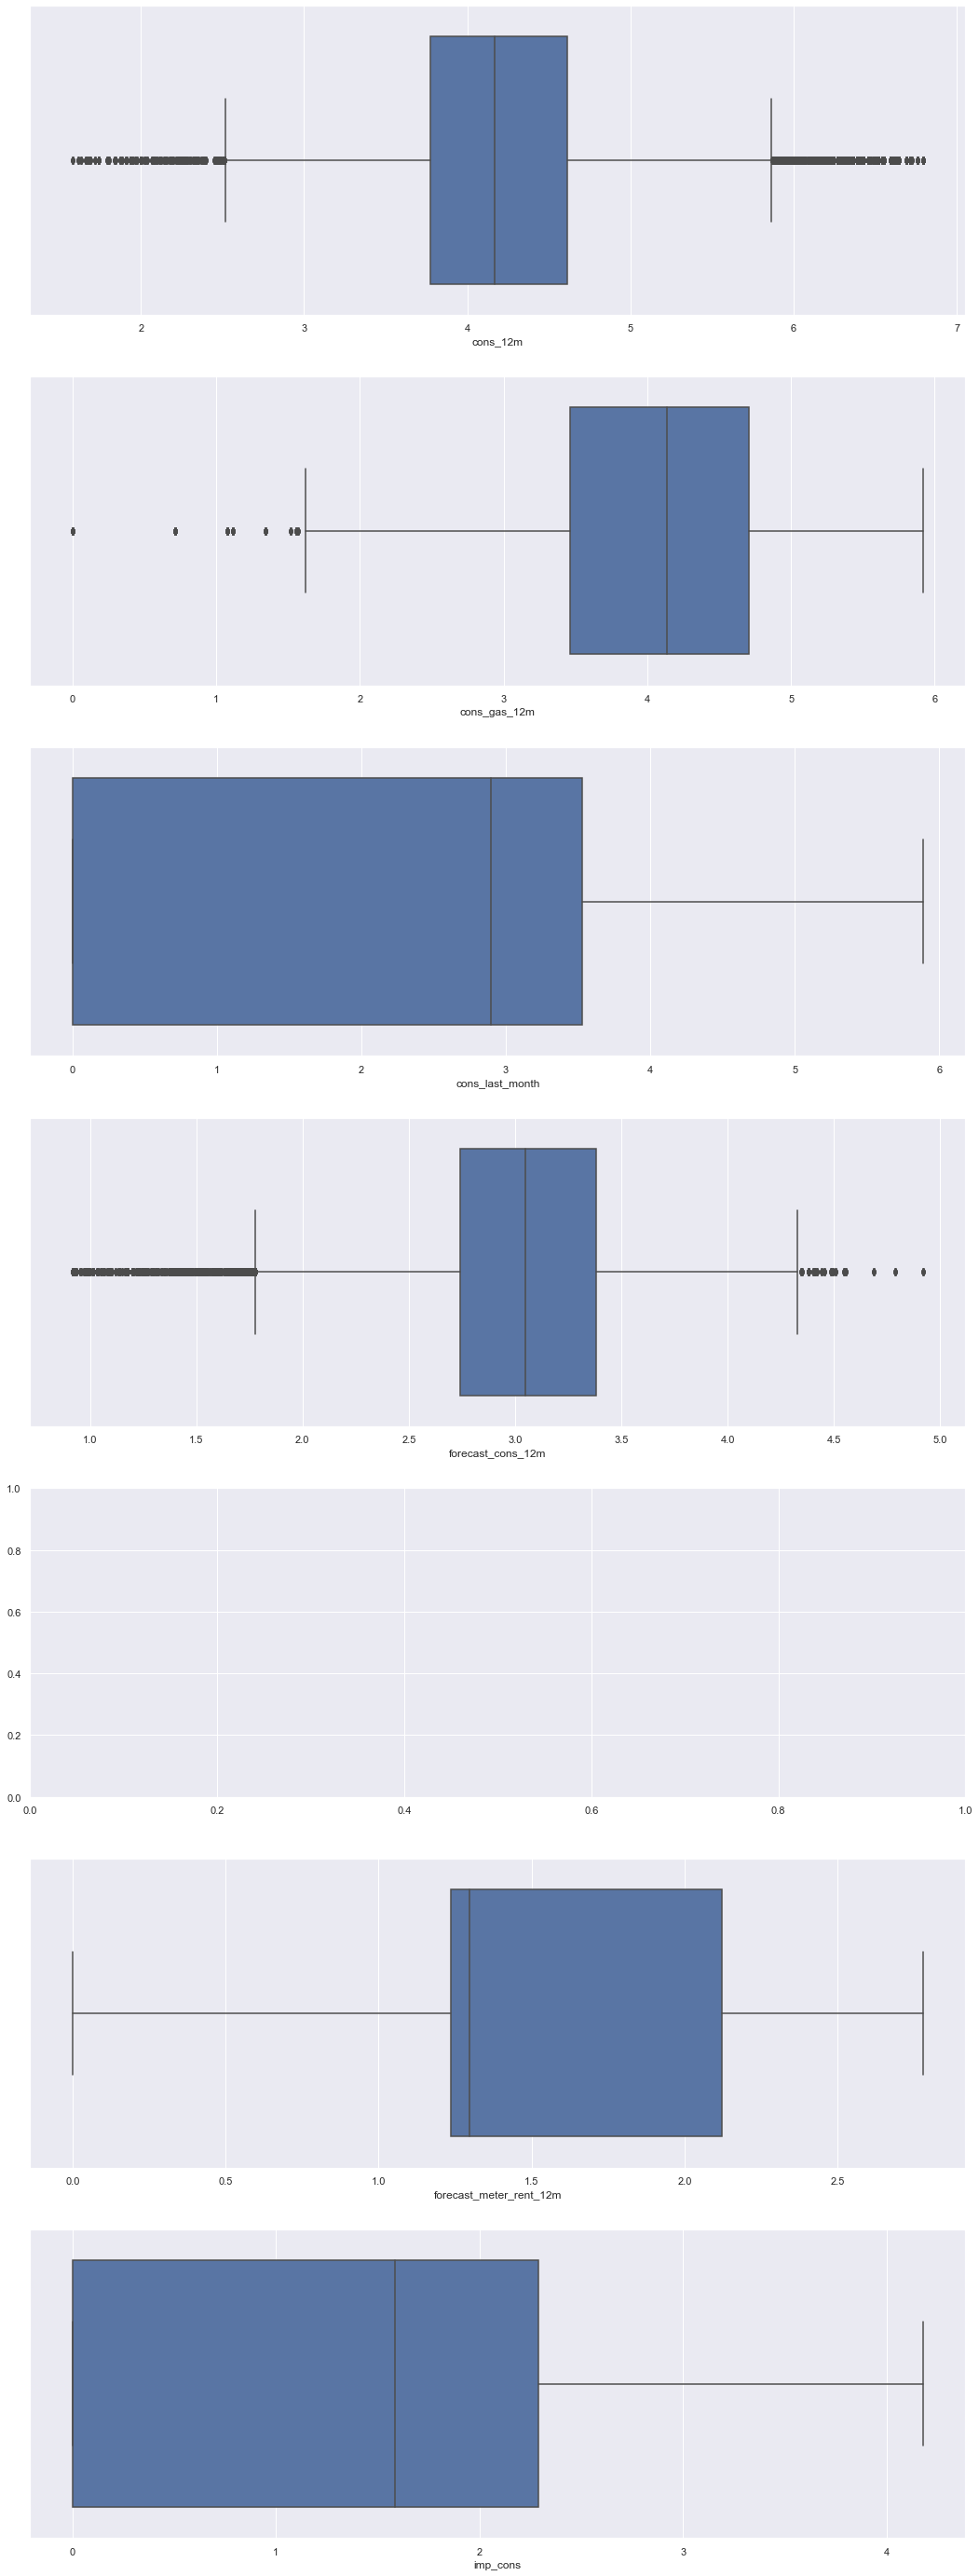

In [926]:
fig, axs = plt.subplots(nrows = 7, figsize = (18, 50));
# Plot Boxplot
sns.boxplot(x = final_df['cons_12m'].dropna(), ax = axs[0]);
sns.boxplot(x = final_df[final_df['has_gas'] == 1]['cons_gas_12m'].dropna(), ax = axs[1]);
sns.boxplot(x = final_df['cons_last_month'].dropna(), ax = axs[2]);
sns.boxplot(x = final_df['forecast_cons_12m'].dropna(), ax = axs[3]);
#sns.boxplot(x = train['forecast_cons_year'].dropna(), ax = axs[4]);
sns.boxplot(x = final_df['forecast_meter_rent_12m'].dropna(), ax = axs[5]);
sns.boxplot(x = final_df['imp_cons'].dropna(), ax = axs[6]);
plt.show()

In [927]:
final_df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,zscore
0,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533
1,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533
2,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533
3,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533
4,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533


In [928]:
features.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476


In [929]:
# Merging the dataset with initial and created features 
final_ready = pd.merge(final_df,features, on ="id")

In [930]:
final_ready.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,zscore,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871
1,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871
2,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871
3,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871
4,24011ae4ebbe3035111d65fa7c15bc57,4.268432,4.739944,0.0,3.041656,0.0,0.444045,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,43.648,1,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383,1096.0,3.0,30.0,5.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,1,0,0.288533,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871


In [931]:
final_ready.columns

Index(['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'pow_max', 'churn', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix', 'contract_tenure',
       'contract_tenure_year', 'months_activ', 'months_to_end',
       'months_modif_prod', 'months_renewal', 'channel_epu', 'channel_ewp',
       'channel_fix', 'channel_foo', 'channel_lmk', 'channel_sdd',
       'channel_usi', 'origin_ewx', 'origin_kam', 'origin_ldk', 'origin_lxi',
       'origin_usa', 'zscore', 'mean_year_price_off_peak_var',
       'mean_year_price_peak_var', 'mean_year_price_mid_peak_var',
       'mean_year_price_off_peak_fix', 'mean

In [932]:
final_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   cons_12m                        175149 non-null  float64
 2   cons_gas_12m                    175149 non-null  float64
 3   cons_last_month                 175149 non-null  float64
 4   forecast_cons_12m               175149 non-null  float64
 5   forecast_discount_energy        175149 non-null  float64
 6   forecast_meter_rent_12m         175149 non-null  float64
 7   forecast_price_energy_off_peak  175149 non-null  float64
 8   forecast_price_energy_peak      175149 non-null  float64
 9   forecast_price_pow_off_peak     175149 non-null  float64
 10  has_gas                         175149 non-null  int64  
 11  imp_cons                        175149 non-null  float64
 12  margin_gross_pow

# Building Models

## Splitting Data

First of all we will split the data into the variable that we are trying to predict y (churn) and those variables that we will use to predict churn X (the rest).

In [933]:
y = train['churn']
X = train.drop(labels = ['id', 'churn'], axis = 1)

In [934]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 18)

Next we will split the data into training and validation data. The percentages of each test can be changed but a 75% - 25% is a good ratio. We also use a random state generator in order to split it randomly.

In [935]:
# Scaling X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
#Repeated Stratified KFold Validation
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

In [936]:
# Defining ROC Curve and AUC Score 
def calculate_roc_auc(model_, X_test_, y_test_):
    '''
    Evaluate the roc-auc score
    '''
    # Get the model predictions
    # Note that we using the prediction for the class 1 -> churn
    prediction_test_ = model_.predict_proba(X_test_)[:, 1]
    # compute roc-auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test_, prediction_test_)
    # print the evaluation metrics as opandas dataframe
    score = pd.DataFrame({'ROC-AUC': [metrics.auc(fpr, tpr)]})
    return fpr, tpr, score

def plot_roc_auc(fpr, tpr):
    '''
    Plotmthe Receiver Operating Characteristic from a list
    of true positive rates and false positive rates
    '''
    # Initialize plot
    f, ax = plt.subplots(figsize = (14, 8))
    # Plot ROC
    roc_auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, 
            lw = 2,
            alpha = 0.3,
            label = 'AUC = %0.2f' % (roc_auc)
           )
    # Plot the random line
    plt.plot([0,1], [0, 1], 
             linestyle = '--',
            lw = 3,
            color = 'r',
            label = 'Random',
            alpha = 0.8)
    # Fine tune and show the plot
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title('ROC-AUC')
    ax.legend(loc = 'lower right')
    plt.show()

In [937]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    final_ready = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    final_ready.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

## Modelling - Logistic Regression 

In [938]:
model = LogisticRegression(solver='sag', max_iter = 300)
result_lr = model.fit(X_train, y_train)
nScores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', error_score = 'raise')
print('Accuracy Logistic Regression (Test Set): %.3f' % mean(nScores))
msg = "%s: %f (%f)" % (model, mean(nScores), nScores.std())
print(msg)   

/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

Accuracy Logistic Regression (Test Set): 0.903
LogisticRegression(max_iter=300, solver='sag'): 0.902536 (0.000168)


/Users/simonetravaglione/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Modeling Evaluation

### Accuracy, Confusion Matrix, Classification Report

We are going to evaluate our Logistic Regression model on out test data (which we did not use for training) using the evaluation metrics of:

- Accuracy: The most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations


- Confusion Matrix: Gives us a holistic view of how well our classification model is performing and what kinds of errors it is making 


- Precision: The ratio of correctly predicted positive observations to the total predicted positive observations


- Recall (Sensitivity): The ratio of correctly predicted positive observations to the all observations in actual class


- Support: The number of occurrences of each class in y_true


- F1 Score: Hybrid metric useful for unbalanced classes


- ROC Curve: The ROC curve can be useful for choosing the threshold value or threshold value. It is generated by plotting the true positive rate (y-axis) against the false positive rate (x-axis) when varying the threshold for assigning observations to a particular class


- AUC Score: AUC(area under the curve). The AUC provides the rate of successful classification according to the logistic model. The AUC simplifies the comparison of the ROC curve of one model with another

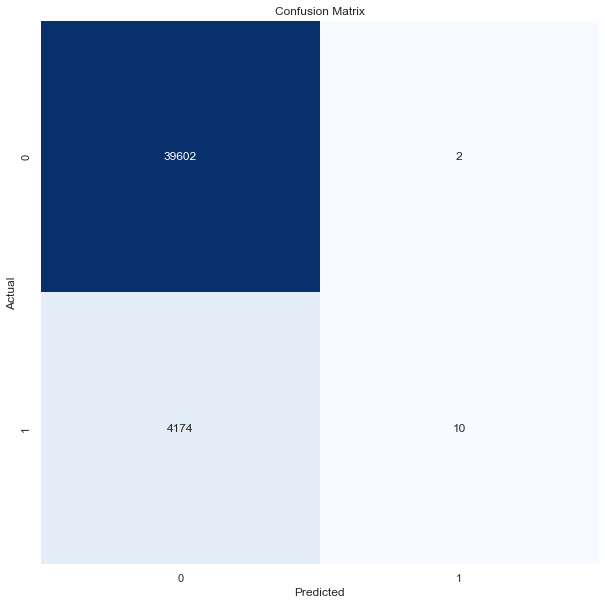

In [939]:
# Building Confusion Matrix 
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [940]:
clr = classification_report(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     39604
           1       0.83      0.00      0.00      4184

    accuracy                           0.90     43788
   macro avg       0.87      0.50      0.48     43788
weighted avg       0.90      0.90      0.86     43788



In [941]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [942]:
auc_score

,ROC-AUC
0,0.656493


### ROC-AUC

Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against false positive rate. It shows the tradeoff between sensitivity and specificity.

In a nutshell, it tells how much model is capable of distinguishing between classes.

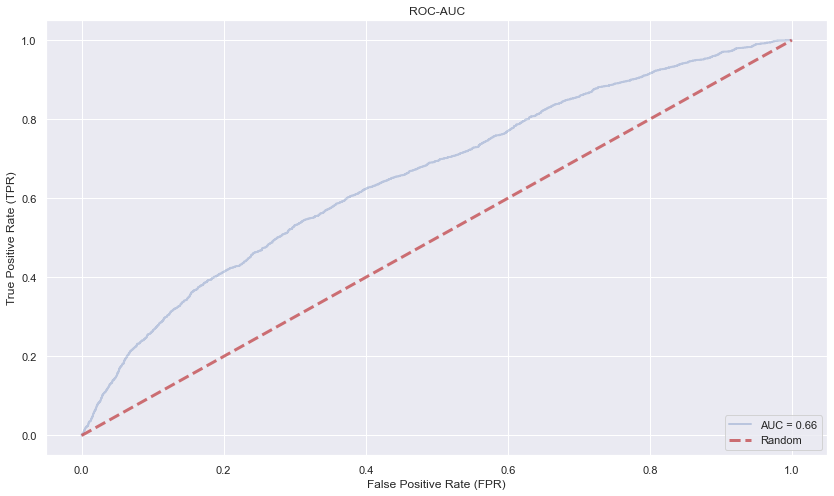

In [943]:
plot_roc_auc(fpr, tpr)
plt.show()

## Modelling - Gradient Boosting

In [946]:
model = GradientBoostingClassifier()
result_gb = model.fit(X_train, y_train)
nScores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', error_score = 'raise') 
print('Accuracy Gradient Boosting Classifier (Test Set): %.3f' % mean(nScores))
msg = "%s: %f (%f)" % (model, mean(nScores), nScores.std())
print(msg)   

Accuracy Gradient Boosting Classifier (Test Set): 0.905
GradientBoostingClassifier(): 0.905094 (0.000436)


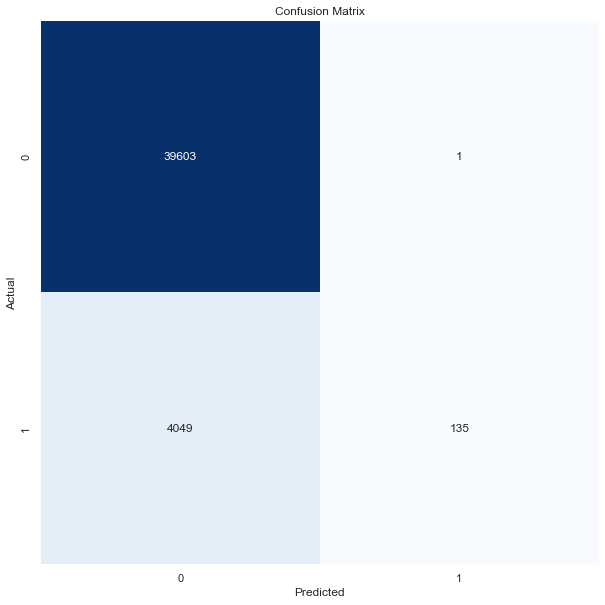

In [947]:
# Building Confusion Matrix 
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [948]:
clr = classification_report(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     39604
           1       0.99      0.03      0.06      4184

    accuracy                           0.91     43788
   macro avg       0.95      0.52      0.51     43788
weighted avg       0.92      0.91      0.87     43788



In [949]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [950]:
auc_score

,ROC-AUC
0,0.772846


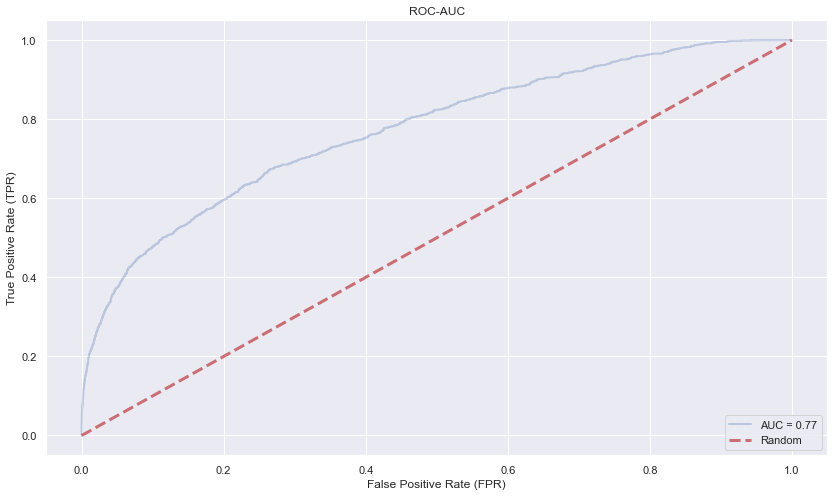

In [951]:
plot_roc_auc(fpr, tpr)
plt.show()

## Modelling - XGBC Classifier 

In [953]:
model = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 500,n_jobs = -1)
result_xgbc = model.fit(X_train, y_train)
nScores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', error_score = 'raise')
print('Accuracy XGBC Classifier (Test Set): %.3f' % mean(nScores))

Accuracy XGBC Classifier (Test Set): 0.983


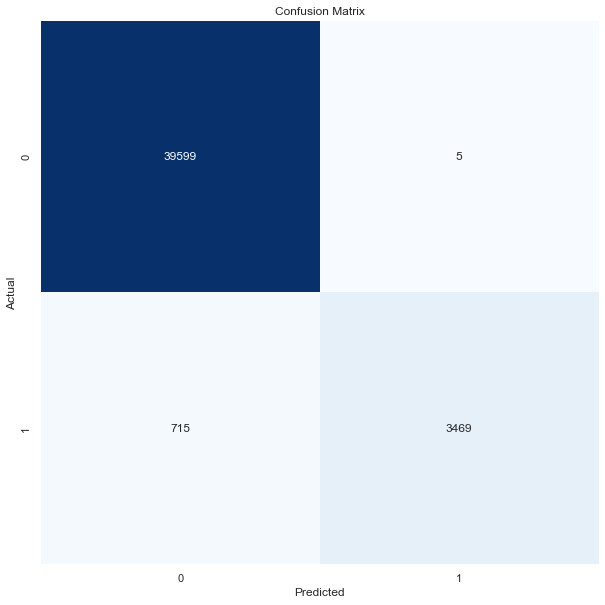

In [954]:
# Building Confusion Matrix 
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [955]:
clr = classification_report(y_test, y_pred)
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     39604
           1       1.00      0.83      0.91      4184

    accuracy                           0.98     43788
   macro avg       0.99      0.91      0.95     43788
weighted avg       0.98      0.98      0.98     43788



In [956]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [957]:
auc_score

,ROC-AUC
0,0.999592


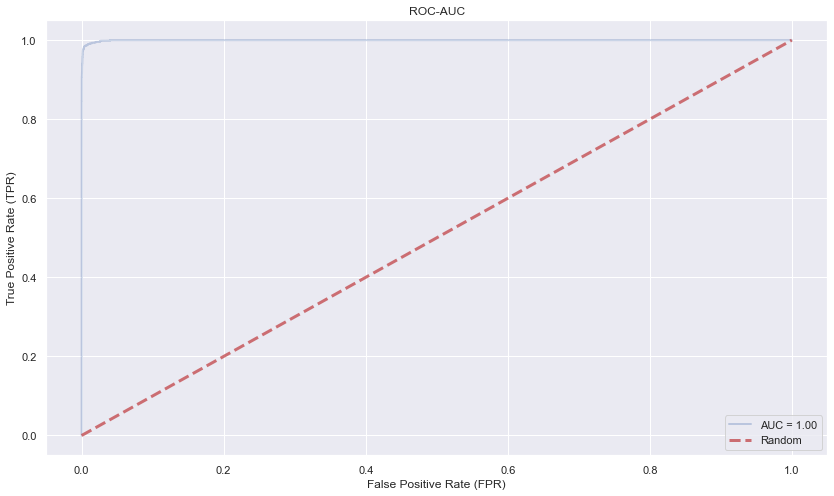

In [958]:
plot_roc_auc(fpr, tpr)
plt.show()

<AxesSubplot:>

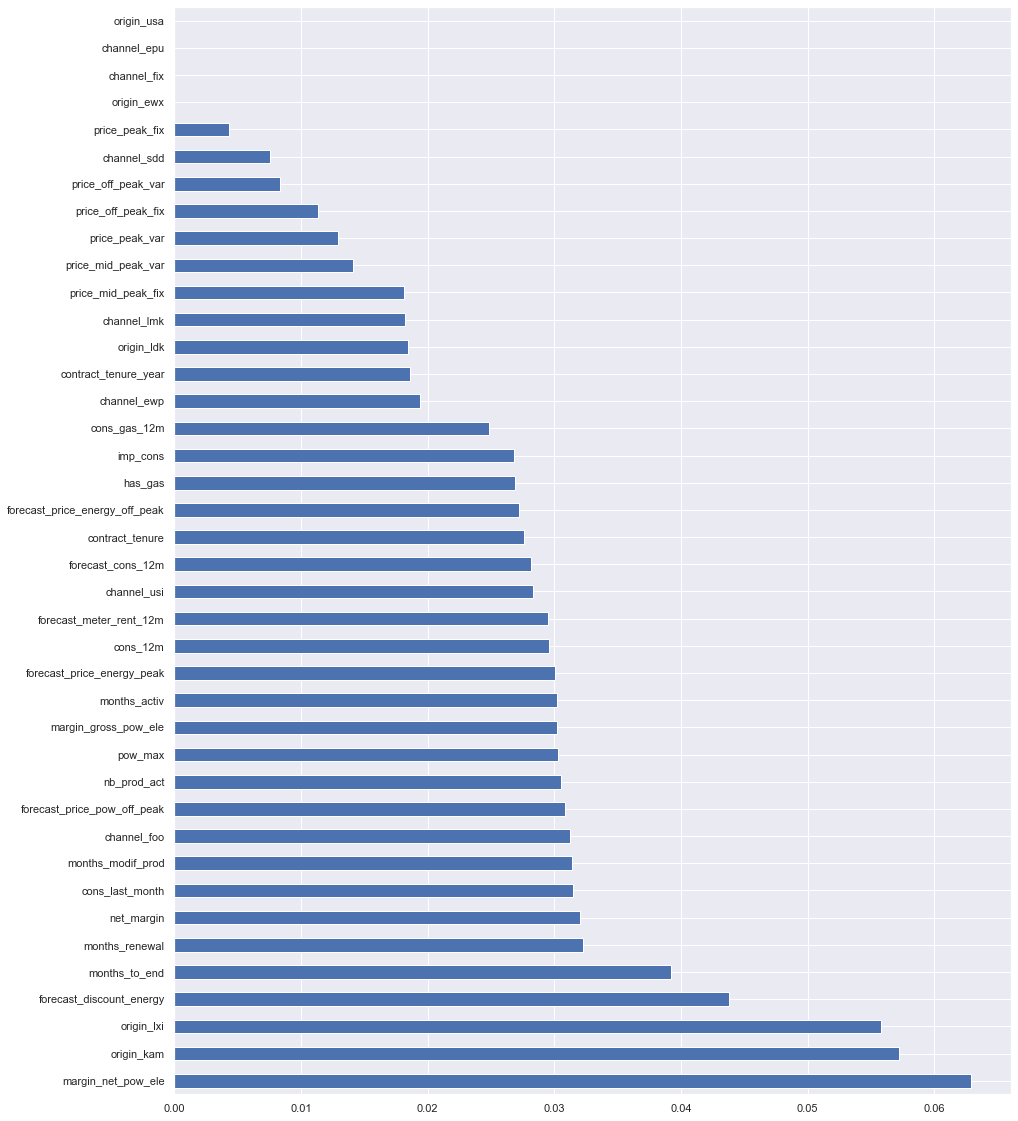

In [959]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(51).plot(kind='barh', figsize =(15,20))

## Modelling - Random Forest

In [960]:
model = RandomForestClassifier(n_estimators=20)
result_rf = model.fit(X_train, y_train)
nScores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', error_score = 'raise')
print('Accuracy Random Forest Classifier (Test Set): %.3f' % mean(nScores))
msg = "%s: %f (%f)" % (model, mean(nScores), nScores.std())
print(msg)   

Accuracy Random Forest Classifier (Test Set): 1.000
RandomForestClassifier(n_estimators=20): 0.999954 (0.000082)


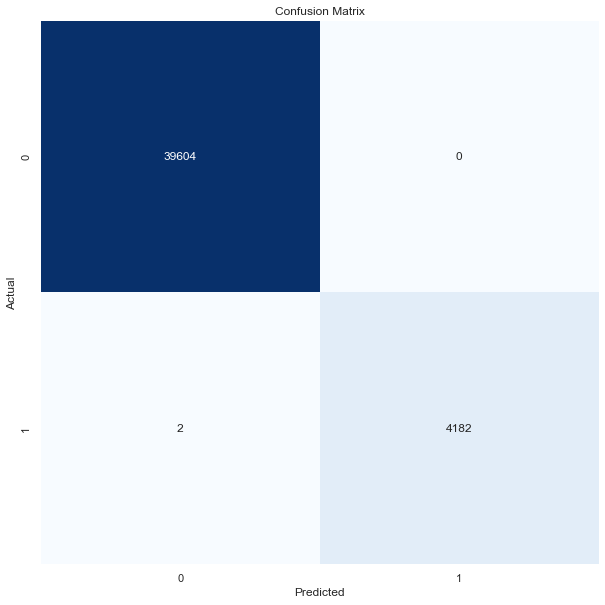

In [961]:
# Building Confusion Matrix 
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [962]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39604
           1       1.00      1.00      1.00      4184

    accuracy                           1.00     43788
   macro avg       1.00      1.00      1.00     43788
weighted avg       1.00      1.00      1.00     43788



In [963]:
fpr, tpr, auc_score = calculate_roc_auc(model, X_test, y_test)

In [964]:
auc_score

,ROC-AUC
0,1.0


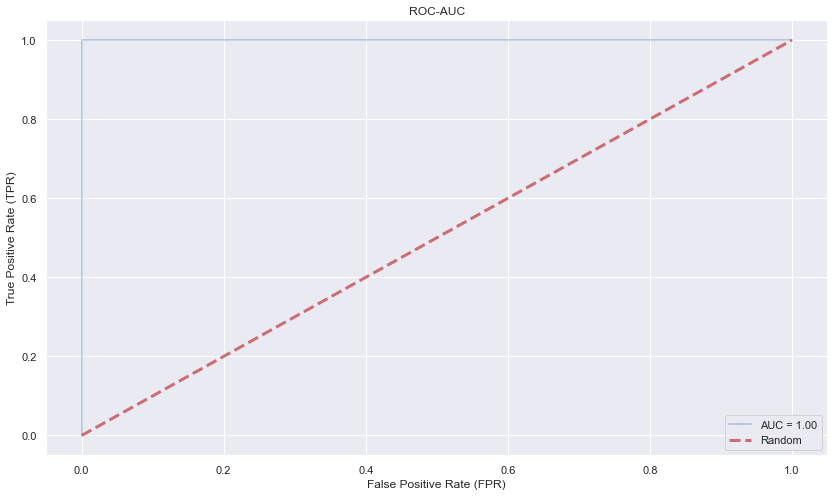

In [965]:
plot_roc_auc(fpr, tpr)
plt.show()

## Feature Importance

One simple way of observing the feature importance is through counting the number of times each feature is split in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear.

<AxesSubplot:>

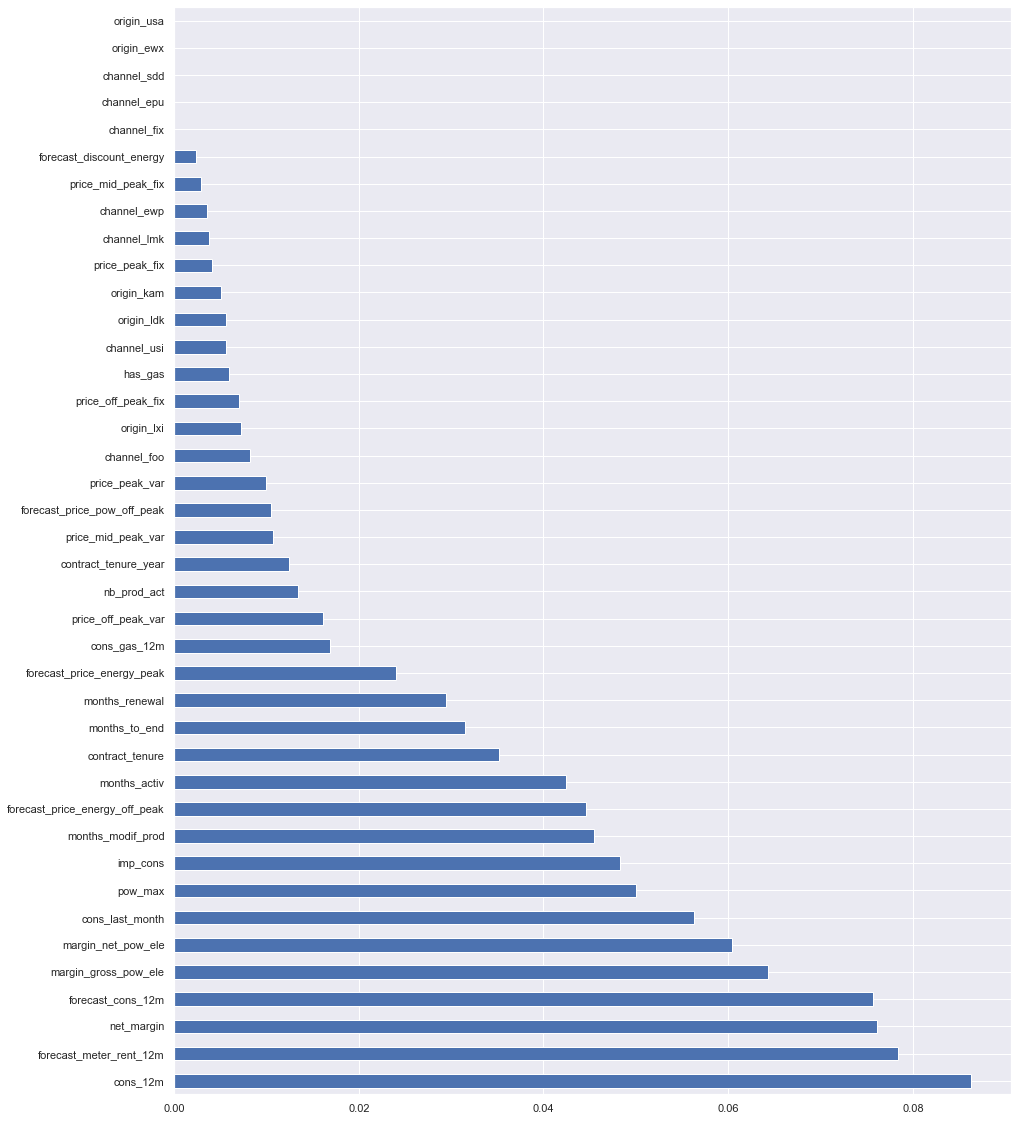

In [966]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(51).plot(kind='barh', figsize =(15,20))

Based on the results achieved by the models used for the prediction of the churn rate, the most effective is the Random Forest. We will then create the dataset that we will use in the following notebook to calculate the discount price, starting from the results we got from the Random Forest.

In [967]:
# Display the first Observations for X_test Data Frame 
X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa
22541,2.470116,-0.442451,1.549620,0.827911,-0.011832,0.421280,1.132572,0.597888,0.646787,-0.471383,-1.089120,-1.718300,-1.718330,-0.407446,-0.902344,-0.362268,1.298959,0.571583,-0.784620,0.789743,-0.780286,-0.780067,-1.093516,-0.999093,-0.964856,-0.682787,-0.962750,1.199935,-0.014601,-0.253452,-0.011037,-1.595734,2.630497,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234
60024,-0.233715,-0.442451,0.515857,0.457913,-0.011832,-0.480903,0.377419,-1.028224,0.580265,-0.471383,0.966859,0.640778,0.640980,-0.407446,0.014635,-0.362268,0.606285,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,-1.765149,-1.748141,-1.494497,-1.537835,-1.208014,1.484537,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234
158603,-0.763586,-0.442451,-1.277793,-0.395593,-0.011832,-0.984836,0.404276,-1.028224,0.580265,-0.471383,-1.089120,-0.547465,-0.547380,-0.407446,-0.607419,-0.722021,0.442933,-1.034095,-0.784620,0.692826,-0.780286,-0.780067,1.256169,1.248052,1.352324,-0.112755,1.489890,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234
38296,0.376927,-0.442451,-1.277793,1.049732,-0.011832,1.125118,-1.166638,0.974802,-1.268082,-0.471383,-1.089120,-0.377932,-0.377830,-0.407446,1.441800,0.789546,-0.852650,1.055876,1.246557,-1.324770,1.225234,1.293935,-1.008786,-0.999093,-1.031061,-0.112755,-0.997788,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234
83923,-0.330529,-0.442451,0.713682,0.290409,-0.011832,-1.126464,0.404276,-1.028224,0.580265,-0.471383,1.275459,-0.556547,-0.556463,-0.407446,-0.204754,-0.573383,0.245841,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,0.501873,0.499003,0.557862,-0.112755,1.069437,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234


In [968]:
# Save the test data
y_test_pred = model.predict_proba(X_test)

X_test['y_test_pred'] = y_test_pred.T[1]
X_test['y_test'] = y_test

X_test.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,y_test_pred,y_test
22541,2.470116,-0.442451,1.549620,0.827911,-0.011832,0.421280,1.132572,0.597888,0.646787,-0.471383,-1.089120,-1.718300,-1.718330,-0.407446,-0.902344,-0.362268,1.298959,0.571583,-0.784620,0.789743,-0.780286,-0.780067,-1.093516,-0.999093,-0.964856,-0.682787,-0.962750,1.199935,-0.014601,-0.253452,-0.011037,-1.595734,2.630497,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,1.0,1
60024,-0.233715,-0.442451,0.515857,0.457913,-0.011832,-0.480903,0.377419,-1.028224,0.580265,-0.471383,0.966859,0.640778,0.640980,-0.407446,0.014635,-0.362268,0.606285,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,-1.765149,-1.748141,-1.494497,-1.537835,-1.208014,1.484537,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234,0.0,0
158603,-0.763586,-0.442451,-1.277793,-0.395593,-0.011832,-0.984836,0.404276,-1.028224,0.580265,-0.471383,-1.089120,-0.547465,-0.547380,-0.407446,-0.607419,-0.722021,0.442933,-1.034095,-0.784620,0.692826,-0.780286,-0.780067,1.256169,1.248052,1.352324,-0.112755,1.489890,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234,0.0,0
38296,0.376927,-0.442451,-1.277793,1.049732,-0.011832,1.125118,-1.166638,0.974802,-1.268082,-0.471383,-1.089120,-0.377932,-0.377830,-0.407446,1.441800,0.789546,-0.852650,1.055876,1.246557,-1.324770,1.225234,1.293935,-1.008786,-0.999093,-1.031061,-0.112755,-0.997788,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,0.0,0
83923,-0.330529,-0.442451,0.713682,0.290409,-0.011832,-1.126464,0.404276,-1.028224,0.580265,-0.471383,1.275459,-0.556547,-0.556463,-0.407446,-0.204754,-0.573383,0.245841,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,0.501873,0.499003,0.557862,-0.112755,1.069437,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,0.0,0


In [969]:
# We create a copy of the test data 
predictions = X_test.copy()

In [970]:
# Display the first Observations for Predictions Dataset 
predictions.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_tenure,contract_tenure_year,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,y_test_pred,y_test
22541,2.470116,-0.442451,1.549620,0.827911,-0.011832,0.421280,1.132572,0.597888,0.646787,-0.471383,-1.089120,-1.718300,-1.718330,-0.407446,-0.902344,-0.362268,1.298959,0.571583,-0.784620,0.789743,-0.780286,-0.780067,-1.093516,-0.999093,-0.964856,-0.682787,-0.962750,1.199935,-0.014601,-0.253452,-0.011037,-1.595734,2.630497,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,1.0,1
60024,-0.233715,-0.442451,0.515857,0.457913,-0.011832,-0.480903,0.377419,-1.028224,0.580265,-0.471383,0.966859,0.640778,0.640980,-0.407446,0.014635,-0.362268,0.606285,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,-1.765149,-1.748141,-1.494497,-1.537835,-1.208014,1.484537,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234,0.0,0
158603,-0.763586,-0.442451,-1.277793,-0.395593,-0.011832,-0.984836,0.404276,-1.028224,0.580265,-0.471383,-1.089120,-0.547465,-0.547380,-0.407446,-0.607419,-0.722021,0.442933,-1.034095,-0.784620,0.692826,-0.780286,-0.780067,1.256169,1.248052,1.352324,-0.112755,1.489890,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,1.912813,-0.983862,-0.01234,0.0,0
38296,0.376927,-0.442451,-1.277793,1.049732,-0.011832,1.125118,-1.166638,0.974802,-1.268082,-0.471383,-1.089120,-0.377932,-0.377830,-0.407446,1.441800,0.789546,-0.852650,1.055876,1.246557,-1.324770,1.225234,1.293935,-1.008786,-0.999093,-1.031061,-0.112755,-0.997788,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,0.0,0
83923,-0.330529,-0.442451,0.713682,0.290409,-0.011832,-1.126464,0.404276,-1.028224,0.580265,-0.471383,1.275459,-0.556547,-0.556463,-0.407446,-0.204754,-0.573383,0.245841,-1.034095,-0.784620,0.789743,-0.780286,-0.780067,0.501873,0.499003,0.557862,-0.112755,1.069437,0.061527,-0.014601,-0.253452,-0.011037,0.626671,-0.380156,-0.026474,-0.322698,-0.008725,-0.644165,-0.522790,1.016403,-0.01234,0.0,0


In [971]:
# Create CSV to use for the Discount Business Impact 
predictions.to_csv("predictions.csv")

## Conclusion 

From the random forest model, i confirmed my assumptions that churn is not due to price sensitivity alone. In fact, price does not work alone, it is affected by another variable which causes customers to churn. Similar to other variables that influences churn, they don't work alone, they are influenced by other variables.

- Electricity consumption of the past 12 months
- Interaction of forecasted power price for 1st period and electricity consumption of the past 12 months
- Interaction of price of energy for the 2nd period and electricity consumption of the past 12 months
- Subscribed power
- Interaction of electricity consumption of the past 12 months and subscribed power
- Interaction of electricity campaign the customer first subscribed to and electricity consumption of the past 12 months.
- Forecasted bill of meter rental for the next 12 months.
